In [ ]:
#Exercise 1 –Preliminary analysis

In [ ]:
#some initial data cleaning might be required before using of data

In [3]:
# Load CSV into DataFrame with automatic delimiter detection, warning on bad lines, 
# using Python engine, and handling commas in numeric values
import pandas as pd
filename = r"Shared_Micromobility_Vehicle_Trips_Austin.csv"
df = pd.read_csv(filename, on_bad_lines="warn" ,sep=None,engine='python', thousands = ",") 

In [5]:
# Display the first 5 rows of the DataFrame for overviewing
df.head(5)

,﻿ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End,Start Time (US/Central),End Time (US/Central)
0,5a23a573-418b-443b-8dc8-d7963fe2b063,5cee599e-832c-4fa5-9050-dcc00e3790f3,scooter,2184.0,4254.483965,11/02/2021 12:45:00 AM,11/02/2021 01:15:00 AM,11/03/2021 03:16:12 AM,11.0,1.0,1.0,9.0,9.0,2021.0,4.845300e+10,4.845300e+10,11/01/2021 07:45:00 PM,11/01/2021 08:15:00 PM
1,dac12ecc-0f79-4faa-a626-674a7c9f3df2,20014eea-19b2-4643-b3b3-63c31e76e57b,scooter,705.0,2670.868099,11/02/2021 01:30:00 AM,11/02/2021 01:30:00 AM,11/03/2021 03:16:12 AM,11.0,1.0,1.0,3.0,9.0,2021.0,4.845300e+10,4.845300e+10,11/01/2021 08:30:00 PM,11/01/2021 08:30:00 PM
2,d6bdc5e8-dec0-4917-ab4f-5b848f61dc5e,2cad7083-7af6-4b22-8540-9b9dfffc2f58,scooter,189.0,258.938744,11/02/2021 01:15:00 AM,11/02/2021 01:30:00 AM,11/03/2021 03:16:10 AM,11.0,1.0,1.0,1.0,1.0,2021.0,4.845300e+10,4.845300e+10,11/01/2021 08:15:00 PM,11/01/2021 08:30:00 PM
3,3b17953e-9d9c-4d27-b5ac-ad76eaac2fbb,fde91af9-deb8-41cc-9ddc-472ff7653d90,scooter,203.0,354.088194,11/02/2021 01:30:00 AM,11/02/2021 01:30:00 AM,11/03/2021 03:16:11 AM,11.0,1.0,1.0,1.0,9.0,2021.0,4.845300e+10,4.845300e+10,11/01/2021 08:30:00 PM,11/01/2021 08:30:00 PM
4,258bea73-5b14-4970-950e-1a1a7c3d715f,b748cae7-7f46-48a7-834d-980565210bf6,scooter,166.0,757.000000,01/30/2022 05:45:00 PM,01/30/2022 05:45:00 PM,02/08/2022 03:12:27 AM,1.0,17.0,6.0,9.0,9.0,2022.0,4.845300e+10,4.845300e+10,01/30/2022 11:45:00 AM,01/30/2022 11:45:00 AM


In [7]:
# Get the number of rows and columns in the DataFrame
df.shape

(514767, 18)

In [9]:
# Check for missing values in each column and count them
df.isnull().sum()

﻿ID                            0
Device ID                      4
Vehicle Type                   5
Trip Duration                  5
Trip Distance                  5
Start Time                     5
End Time                       5
Modified Date                  5
Month                          5
Hour                           5
Day of Week                    5
Council District (Start)    1104
Council District (End)      1166
Year                           5
Census Tract Start          1059
Census Tract End            1056
Start Time (US/Central)      665
End Time (US/Central)        665
dtype: int64

In [11]:
# Filter out trips with zero 'Trip Duration' or 'Trip Distance' as they are likely invalid records
df_cleaned = df[(df['Trip Duration'] != 0) & (df['Trip Distance'] != 0)]
df_cleaned.shape

(498533, 18)

In [15]:
# Generate summary statistics for numeric columns in the DataFrame
df_cleaned.describe()

,Trip Duration,Trip Distance,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End
count,498528.000000,4.985280e+05,498528.000000,498528.000000,498528.000000,497487.000000,497425.000000,498528.000000,4.975310e+05,4.975340e+05
mean,695.117861,1.791683e+03,8.789570,11.469705,3.374527,7.576363,7.520185,2021.032656,4.845300e+10,4.845300e+10
std,2921.813407,2.578594e+04,1.669742,8.292726,2.101059,2.671078,2.709000,0.177735,7.625293e+04,1.013355e+06
min,1.000000,7.082727e-01,1.000000,0.000000,0.000000,1.000000,1.000000,2021.000000,4.845300e+10,4.802195e+10
25%,247.000000,5.850000e+02,8.000000,3.000000,1.000000,9.000000,9.000000,2021.000000,4.845300e+10,4.845300e+10
50%,442.000000,1.180000e+03,9.000000,13.000000,4.000000,9.000000,9.000000,2021.000000,4.845300e+10,4.845300e+10
75%,799.000000,2.153000e+03,9.000000,19.000000,5.000000,9.000000,9.000000,2021.000000,4.845300e+10,4.845300e+10
max,693899.000000,1.154537e+07,12.000000,23.000000,6.000000,10.000000,10.000000,2022.000000,4.849102e+10,4.849102e+10


In [19]:
# Generate summary statistics of the DataFrame, including the 98th percentile
describe_with_90 = df_cleaned.describe(percentiles=[0.98])
describe_with_90

,Trip Duration,Trip Distance,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End
count,498528.000000,4.985280e+05,498528.000000,498528.000000,498528.000000,497487.000000,497425.000000,498528.000000,4.975310e+05,4.975340e+05
mean,695.117861,1.791683e+03,8.789570,11.469705,3.374527,7.576363,7.520185,2021.032656,4.845300e+10,4.845300e+10
std,2921.813407,2.578594e+04,1.669742,8.292726,2.101059,2.671078,2.709000,0.177735,7.625293e+04,1.013355e+06
min,1.000000,7.082727e-01,1.000000,0.000000,0.000000,1.000000,1.000000,2021.000000,4.845300e+10,4.802195e+10
50%,442.000000,1.180000e+03,9.000000,13.000000,4.000000,9.000000,9.000000,2021.000000,4.845300e+10,4.845300e+10
98%,3054.000000,6.809000e+03,12.000000,23.000000,6.000000,9.000000,9.000000,2022.000000,4.845300e+10,4.845300e+10
max,693899.000000,1.154537e+07,12.000000,23.000000,6.000000,10.000000,10.000000,2022.000000,4.849102e+10,4.849102e+10


In [21]:
# Filter the DataFrame to include only rows where 'Trip Duration' > 60 and 'Trip Distance' > 100
df_cleaned = df[(df['Trip Duration'] > 60) & (df['Trip Distance'] > 100)]

In [23]:
# Calculate the 1st and 99th percentiles for 'Trip Distance'
lower_bound = df['Trip Distance'].quantile(0.01)
upper_bound = df['Trip Distance'].quantile(0.99)

# Filter the DataFrame to exclude 'Trip Distance' values outside the 1st and 99th percentiles
df_cleaned = df_cleaned[(df_cleaned['Trip Distance'] >= lower_bound) & (df_cleaned['Trip Distance'] <= upper_bound)]

# Get the number of rows and columns in the cleaned DataFrame after filtering outliers
df_cleaned.shape


(457782, 18)

In [29]:
#checking null value again
df_cleaned.isnull().sum()

﻿ID                           0
Device ID                     0
Vehicle Type                  0
Trip Duration                 0
Trip Distance                 0
Start Time                    0
End Time                      0
Modified Date                 0
Month                         0
Hour                          0
Day of Week                   0
Council District (Start)    871
Council District (End)      893
Year                          0
Census Tract Start          835
Census Tract End            835
Start Time (US/Central)     481
End Time (US/Central)       481
dtype: int64

In [33]:
#******question one******

#The number of records before and after data cleaning

print("Number of records before cleaning:", len(df))
print("Number of records after cleaning:", len(df_cleaned))

Number of records before cleaning: 514767
Number of records after cleaning: 457782


In [37]:
#******question two******
#When did collection of data start(start-date and time) for micro-mobility dataset and what is the most recent date and time available

# Convert the 'Start Time' column to datetime format
df_cleaned['Start Time'] = pd.to_datetime(df_cleaned['Start Time'], format='%m/%d/%Y %I:%M:%S %p')

# Get the earliest 'Start Time' in the cleaned DataFrame
start_date_time = df_cleaned['Start Time'].min()

# Get the most recent 'Start Time' in the cleaned DataFrame
most_recent_date_time = df_cleaned['Start Time'].max()

# Print the result
print(f"The collection of data started on: {start_date_time}")
print(f"The most recent date and time available is: {most_recent_date_time}")

The collection of data started on: 2021-08-19 05:30:00
The most recent date and time available is: 2022-03-25 01:00:00


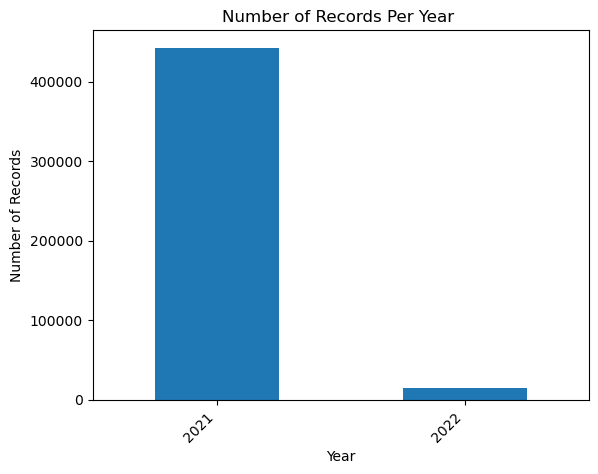

,record_count
Year,
2021,442626
2022,15156


In [39]:
#******question three******

#Number of records per year

import matplotlib.pyplot as plt
# Group by year and month and count the number of records
records_per_year = df_cleaned.groupby(['Year']).size().reset_index(name='record_count')
records_per_year["Year"]=records_per_year["Year"].astype(int)

# # Set 'year' as the index for plotting
records_per_year.set_index('Year', inplace=True)

records_per_year['record_count'].plot(kind='bar', x='record_count')

# # Customize the plot

plt.title('Number of Records Per Year ')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.show()
records_per_year

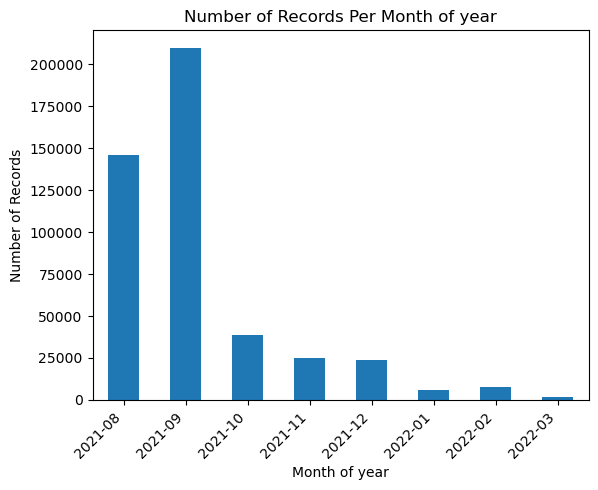

,Year,Month,record_count
year_month,,,
2021-08,2021,8,145798
2021-09,2021,9,209821
2021-10,2021,10,38478
2021-11,2021,11,24677
2021-12,2021,12,23852
2022-01,2022,1,5943
2022-02,2022,2,7622
2022-03,2022,3,1591


In [41]:
#******question three******

#Number of records per month


# Group by year and month and count the number of records
records_per_month = df_cleaned.groupby(['Year', 'Month']).size().reset_index(name='record_count')

# records_per_month
records_per_month["Year"]=records_per_month["Year"].astype(int)
records_per_month["Month"]=records_per_month["Month"].astype(int)

# Create a "Year-Month" column for better visualization
records_per_month['year_month'] = records_per_month['Year'].astype(str) + '-' + records_per_month['Month'].astype(str).str.zfill(2)


# # Set 'year_month' as the index for plotting
records_per_month.set_index('year_month', inplace=True)

# # Plot the bar plot
# # records_per_month['record_count'].plot(kind='bar', figsize=(12, 6), color='steelblue')
records_per_month['record_count'].plot(kind='bar', x="records_per_month")


# # Customize the plot
# import matplotlib.pyplot as plt
plt.title('Number of Records Per Month of year')
plt.xlabel('Month of year')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.show()
records_per_month

   Year Vehicle Type  unique_vehicle_count
0  2021      bicycle                   633
1  2021        moped                   527
2  2021      scooter                 24583
3  2022      bicycle                   152
4  2022          car                   232
5  2022        moped                     6
6  2022      scooter                  6977


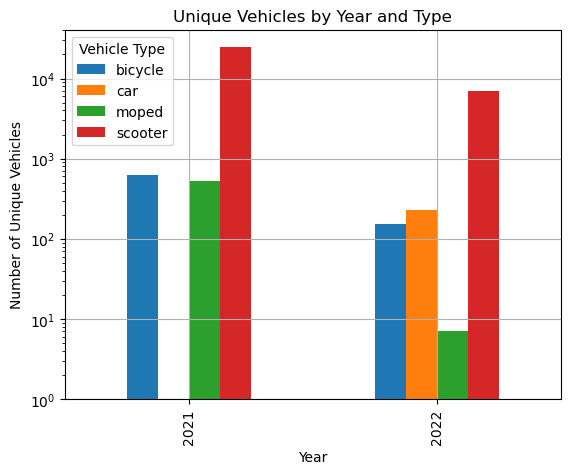

In [43]:
#******question four******
#Number of unique vehicles by year and vehicle type

unique_vehicles = df_cleaned.groupby(['Year', 'Vehicle Type'])['Device ID'].nunique().reset_index(name='unique_vehicle_count')
unique_vehicles["Year"]=unique_vehicles["Year"].astype(int)
print(unique_vehicles)


# Pivot for better visualization
pivot_table = unique_vehicles.pivot(index='Year', columns='Vehicle Type', values='unique_vehicle_count')

# Plot trends over years
pivot_table.plot(kind='bar' , log=True)
plt.title('Unique Vehicles by Year and Type')
plt.ylabel('Number of Unique Vehicles')
plt.xlabel('Year')
plt.grid(True)
plt.legend(title='Vehicle Type')
plt.show()

    Year  Month Vehicle Type  unique_vehicle_count year_month
0   2021      8      bicycle                   243    2021-08
1   2021      8      scooter                 10535    2021-08
2   2021      9      bicycle                   426    2021-09
3   2021      9        moped                   505    2021-09
4   2021      9      scooter                 17575    2021-09
5   2021     10      bicycle                   208    2021-10
6   2021     10      scooter                  9700    2021-10
7   2021     11      bicycle                   121    2021-11
8   2021     11        moped                    20    2021-11
9   2021     11      scooter                  7496    2021-11
10  2021     12      bicycle                   184    2021-12
11  2021     12        moped                     2    2021-12
12  2021     12      scooter                  7623    2021-12
13  2022      1      bicycle                    80    2022-01
14  2022      1          car                     7    2022-01
15  2022

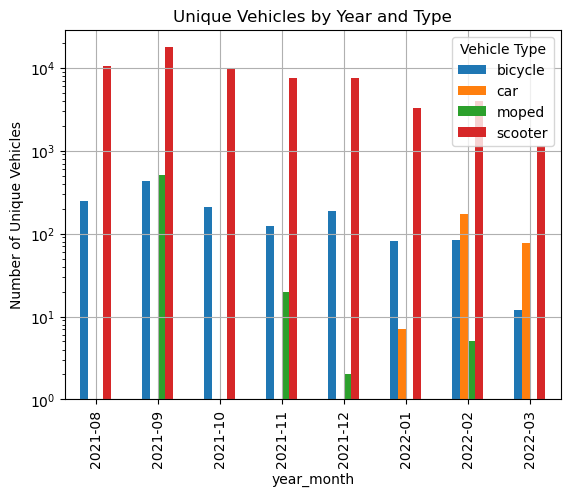

In [45]:
#******question four******
#Number of unique vehicles by year& months and vehicle type
unique_vehicles = df_cleaned.groupby(['Year', "Month",'Vehicle Type'])['Device ID'].nunique().reset_index(name='unique_vehicle_count')
unique_vehicles["Year"]=unique_vehicles["Year"].astype(int)
unique_vehicles["Month"]=unique_vehicles["Month"].astype(int)

unique_vehicles['year_month'] = unique_vehicles['Year'].astype(str) + '-' + unique_vehicles['Month'].astype(str).str.zfill(2)
pivot_table = unique_vehicles.pivot(index='year_month', columns='Vehicle Type', values='unique_vehicle_count')
print(unique_vehicles)
# Plot trends over years
pivot_table.plot(kind='bar' , log=True)
plt.title('Unique Vehicles by Year and Type')
plt.ylabel('Number of Unique Vehicles')
plt.xlabel('year_month')
plt.grid(True)
plt.legend(title='Vehicle Type')
plt.show()


   Day of Week Vehicle Type  unique_vehicle_count
0       Friday      bicycle                   311
1       Friday          car                    34
2       Friday        moped                    76
3       Friday      scooter                 14986
4       Monday      bicycle                   389
5       Monday          car                    17
6       Monday        moped                    75
7       Monday      scooter                 16342
8     Saturday      bicycle                   325
9     Saturday          car                    32
10    Saturday        moped                    72
11    Saturday      scooter                 15318
12      Sunday      bicycle                   397
13      Sunday          car                    69
14      Sunday        moped                    78
15      Sunday      scooter                 19553
16    Thursday      bicycle                   309
17    Thursday          car                    20
18    Thursday        moped                     7


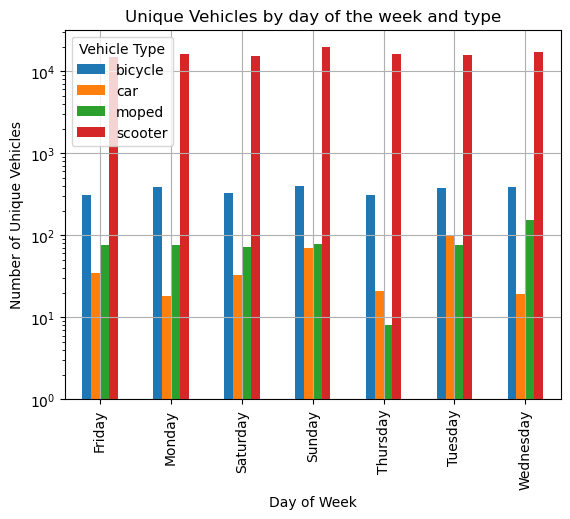

In [50]:
#******question four******
#patterns among different days of the week

day_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

if pd.api.types.is_numeric_dtype(df_cleaned['Day of Week']):
    df_cleaned['Day of Week'] = df_cleaned['Day of Week'].astype('object')
    df_cleaned['Day of Week'] = df_cleaned['Day of Week'].map(day_mapping)


unique_vehicles = df_cleaned.groupby(['Day of Week','Vehicle Type'])['Device ID'].nunique().reset_index(name='unique_vehicle_count')

pivot_table = unique_vehicles.pivot(index='Day of Week', columns='Vehicle Type', values='unique_vehicle_count')
correct_day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
print(unique_vehicles)


# Plot trends over years
pivot_table.plot(kind='bar', log=True)
plt.title('Unique Vehicles by day of the week and type')
plt.ylabel('Number of Unique Vehicles')
plt.xlabel('Day of Week')
plt.grid(True)
plt.legend(title='Vehicle Type')
plt.show()


Pivot Table:
 Vehicle Type  bicycle    car  moped  scooter
Month                                       
January          80.0    7.0    1.0   3264.0
February         83.0  172.0    5.0   3978.0
March            11.0   77.0    0.0   1139.0
April             0.0    0.0    0.0      0.0
May               0.0    0.0    0.0      0.0
June              0.0    0.0    0.0      0.0
July              0.0    0.0    0.0      0.0
August          243.0    0.0    0.0  10535.0
September       426.0    0.0  505.0  17575.0
October         208.0    0.0    0.0   9700.0
November        121.0    0.0   20.0   7496.0
December        184.0    0.0    2.0   7623.0


<Figure size 1200x600 with 0 Axes>

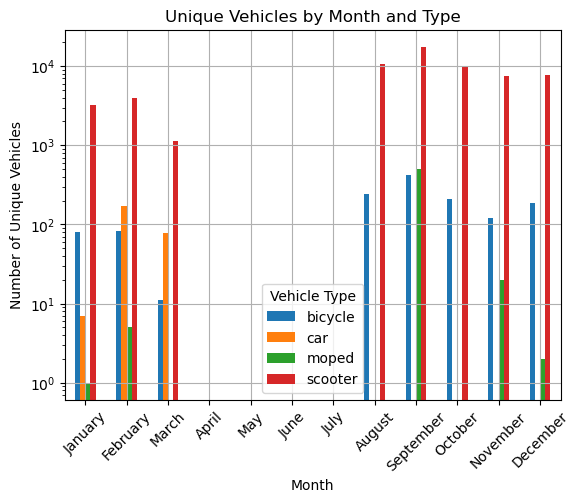

In [52]:
#******question four******
#patterns among different months

month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# **Map and clean the Month column**
if pd.api.types.is_numeric_dtype(df_cleaned['Month']):
    df_cleaned['Month'] = df_cleaned['Month'].astype('object')
    df_cleaned['Month'] = df_cleaned['Month'].map(month_mapping)

# **Group unique vehicles by Month and Vehicle Type**
unique_vehicles = df_cleaned.groupby(['Month', 'Vehicle Type'])['Device ID'].nunique().reset_index(name='unique_vehicle_count')

# **Pivot Table**
pivot_table = unique_vehicles.pivot(index='Month', columns='Vehicle Type', values='unique_vehicle_count')

# **Reindex Months**
correct_month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                       'July', 'August', 'September', 'October', 'November', 'December']

# Clean up index and reindex to ensure all months are present
pivot_table.index = pivot_table.index.str.strip().str.capitalize()
pivot_table = pivot_table.reindex(correct_month_order).fillna(0)  # Reindex and fill missing values with 0


print("\nPivot Table:\n", pivot_table)

# **Plot the Data**
plt.figure(figsize=(12, 6))  # Set plot size
pivot_table.plot(kind='bar', log=True)
plt.title('Unique Vehicles by Month and Type')
plt.ylabel('Number of Unique Vehicles')
plt.xlabel('Month')
plt.grid(True)
plt.legend(title='Vehicle Type')
plt.xticks(rotation=45)  # Rotate month labels for better visibility
plt.show()

Device ID
8673315b-41b2-42b9-b42c-8b729f04da39    124
dc4c9961-c05f-441e-9f60-cd8a445d8991    109
e2eef0f4-ecf7-41c8-a7c7-d3c8b161db6f    106
25abacce-3420-4780-946d-614fbd5c1209    100
5e3bb9b3-06a3-4fd6-a076-ed6bcb6e36a1     98
                                       ... 
805a25d6-75ad-47df-98d7-6d8fc3834466      1
46e96654-5573-45f4-9a59-473c3f0fd674      1
641b6600-844e-4cfa-8bc7-4e130785825f      1
ef1383cf-876c-4ca6-9617-6edf8cd580e0      1
0d30c9d2-010f-4d42-b49b-b44d23153ce6      1
Name: count, Length: 29340, dtype: int64


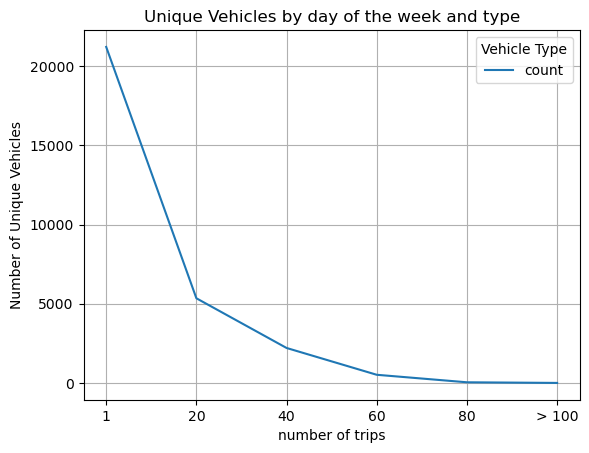

In [54]:
##******question five******
#Calculate the number of trips for each vehicle in the database(Categorize vehicles based on trip count)

trips_per_vehicle = df_cleaned['Device ID'].value_counts()
print(trips_per_vehicle)

# **Step 1: Categorize vehicles based on trip count**
def categorize_trips(trip_count):
    if trip_count > 100:
        return '> 100'
    elif 80 < trip_count <= 100:
        return '80'
    elif 60 < trip_count <= 80:
        return '60'
    elif 40 < trip_count <= 60:
        return '40'
    elif 20 < trip_count <= 40:
        return '20'
    else:
        return '1'

# Apply the categorization function to the trip count series
categories = trips_per_vehicle.apply(categorize_trips)
category_counts = categories.value_counts()
category_counts
category_counts.plot(kind='line')
plt.title('Unique Vehicles by day of the week and type')
plt.ylabel('Number of Unique Vehicles')
plt.xlabel('number of trips')
plt.grid(True)
plt.legend(title='Vehicle Type')
plt.show()

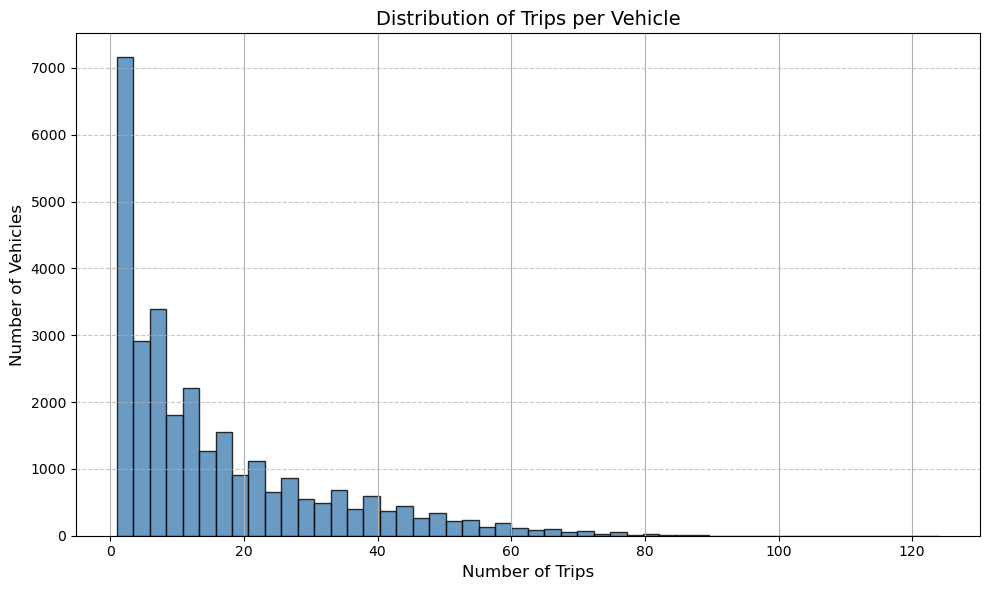

In [66]:
##******question five******
#Calculate the number of trips for each vehicle in the database and produce a histogram for it

plt.figure(figsize=(10, 6))
trips_per_vehicle.hist(bins=50, color='steelblue', edgecolor='black', alpha=0.8)
plt.title('Distribution of Trips per Vehicle', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=12)
plt.xlabel('Number of Trips', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#Exercise 2 –OD matrix


In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
#******question one******
#Compute then the O-D matrix
# Create a matrix showing trip counts between council districts with outlier

matrix = (
    df_cleaned.assign(count=1)
    .pivot_table(index="Council District (Start)", columns="Council District (End)",
                 values="count", aggfunc="count")
    .fillna(0)
    .astype(int)
).sort_values("Council District (Start)")

matrix


Council District (End),1.0,2.0,3.0,4.0,5.0,7.0,8.0,9.0,10.0
Council District (Start),,,,,,,,,
1.0,9369,0,3251,47,164,4,39,13783,23
2.0,1,318,142,0,23,0,3,8,0
3.0,3883,213,34390,5,713,0,74,20552,18
4.0,53,0,1,390,1,82,0,199,13
5.0,123,32,802,0,8261,0,714,7305,44
7.0,6,0,2,80,0,297,0,141,50
8.0,24,1,41,0,706,0,970,937,28
9.0,14224,67,23476,327,7795,191,1281,298668,1035
10.0,13,0,15,31,21,68,21,613,700


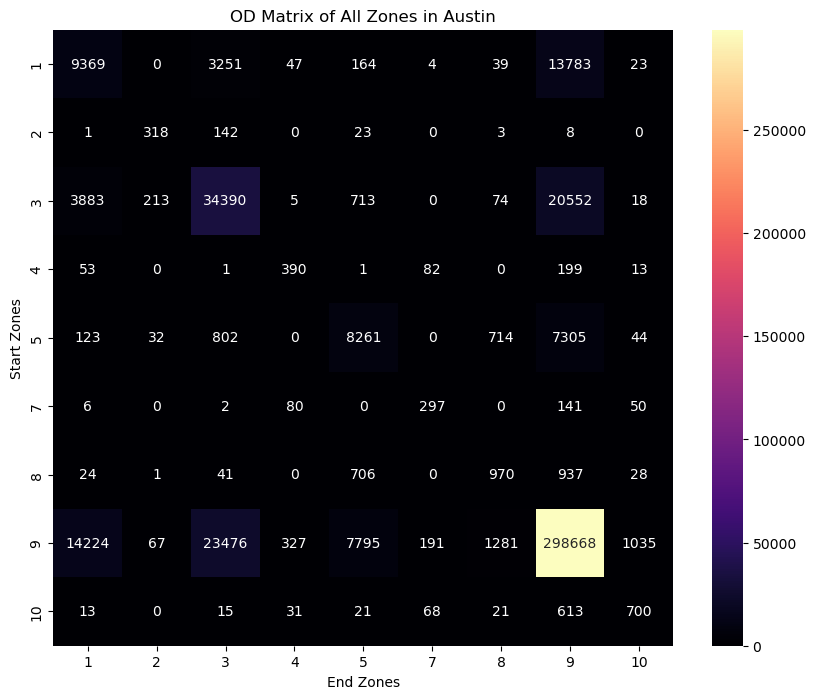

In [77]:

#Try to visualize the results in a meaningful way by heatmap

matrix.index = [1, 2, 3, 4, 5, 7, 8, 9, 10]  # Start Zones
matrix.columns = [1, 2, 3, 4, 5, 7, 8, 9, 10]  # End Zones

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt="d", cmap="magma", cbar=True)

# Add title and labels
plt.title("OD Matrix of All Zones in Austin")
plt.xlabel("End Zones")
plt.ylabel("Start Zones")

# Show the plot
plt.show()


OD Matrix for Scooter - Morning Peak (October):

    1   2   3   4   5   7   8    9   10
1   13   0   3   0   0   0   0   13   0
2    0   2   1   0   0   0   0    0   0
3    8   2  70   0   1   0   0   33   0
4    0   0   0   1   0   0   0    0   0
5    0   0   4   0  13   0   0    9   0
7    0   0   0   0   0   0   0    0   0
8    0   0   0   0   0   0   0    0   0
9   30   0  84   1  11   0   0  505   1
10   0   0   0   0   0   0   0    0   0

--------------------------------------------------



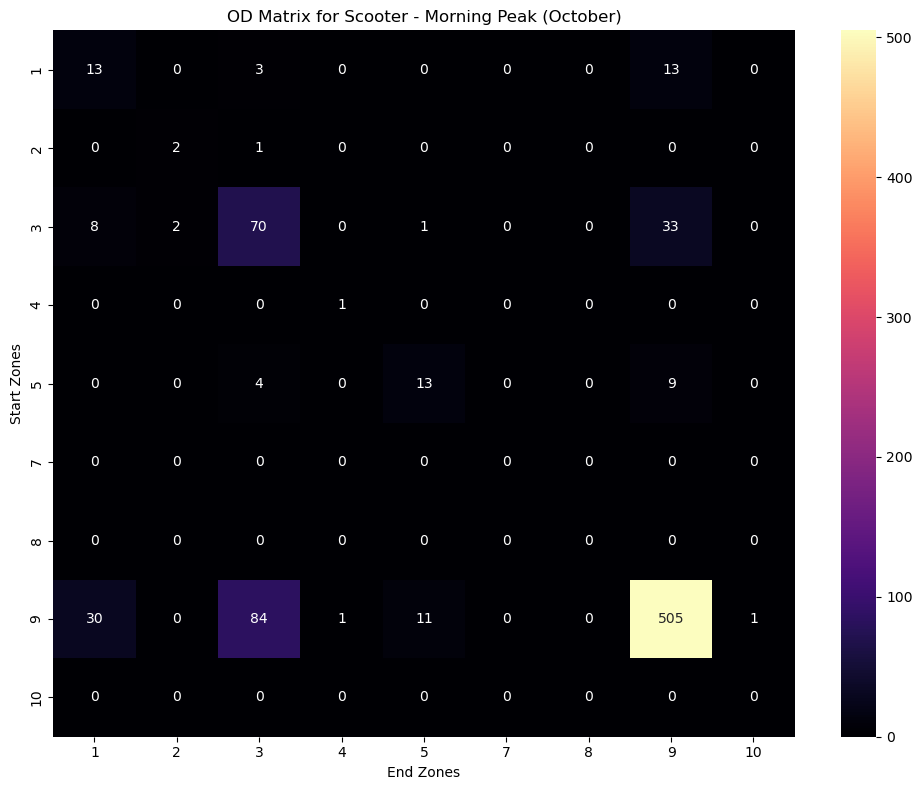

OD Matrix for Scooter - Morning Peak (December):

    1   2    3   4   5   7   8     9   10
1   28   0   12   0   0   0   0    21   0
2    0   0    0   0   0   0   0     0   0
3   19   0  106   0   1   0   0    41   0
4    1   0    0   2   0   0   0     1   0
5    0   0    0   0  22   0   0     8   0
7    0   0    0   0   0   1   0     4   0
8    0   0    0   0   0   0   0     0   0
9   77   1  119   2  30   0   0  1004   7
10   0   0    0   0   0   1   0     0   1

--------------------------------------------------



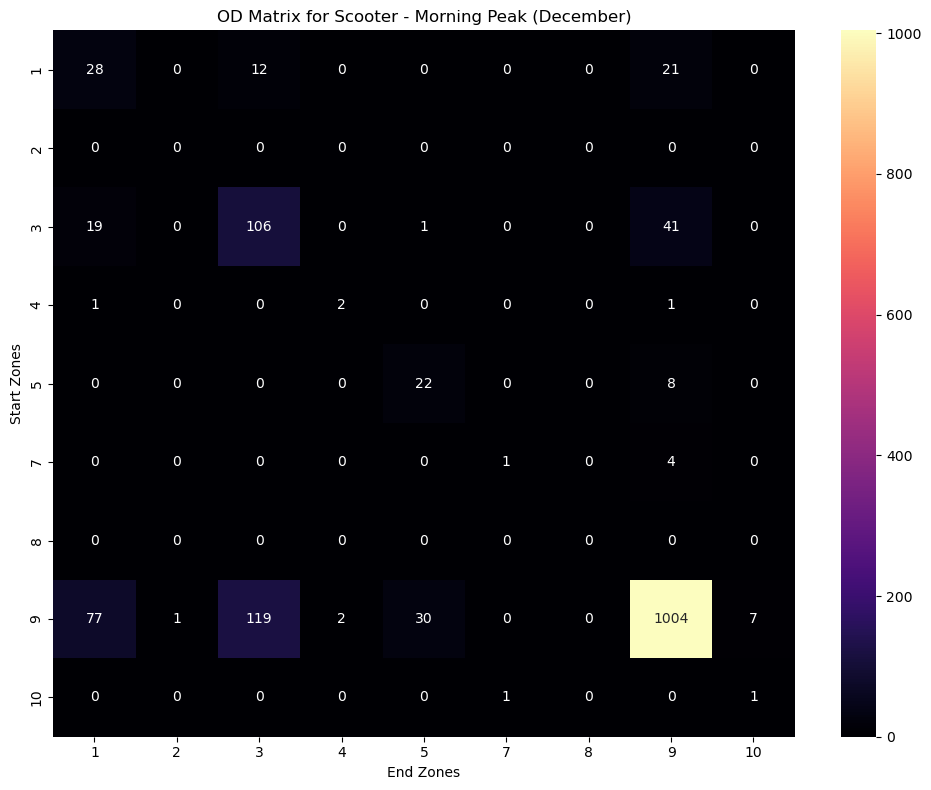

OD Matrix for Scooter - Morning Peak (February):

    1   2   3   4   5   7   8    9   10
1    3   0   1   0   0   0   0    4   0
2    0   0   0   0   0   0   0    0   0
3    1   0  20   0   1   0   0    4   0
4    0   0   0   0   0   0   0    0   0
5    0   0   0   0   3   0   0    2   0
7    0   0   0   0   0   0   0    0   0
8    0   0   0   0   0   0   1    0   0
9    8   0  24   1   2   1   0  129   1
10   0   0   0   0   0   0   0    0   0

--------------------------------------------------



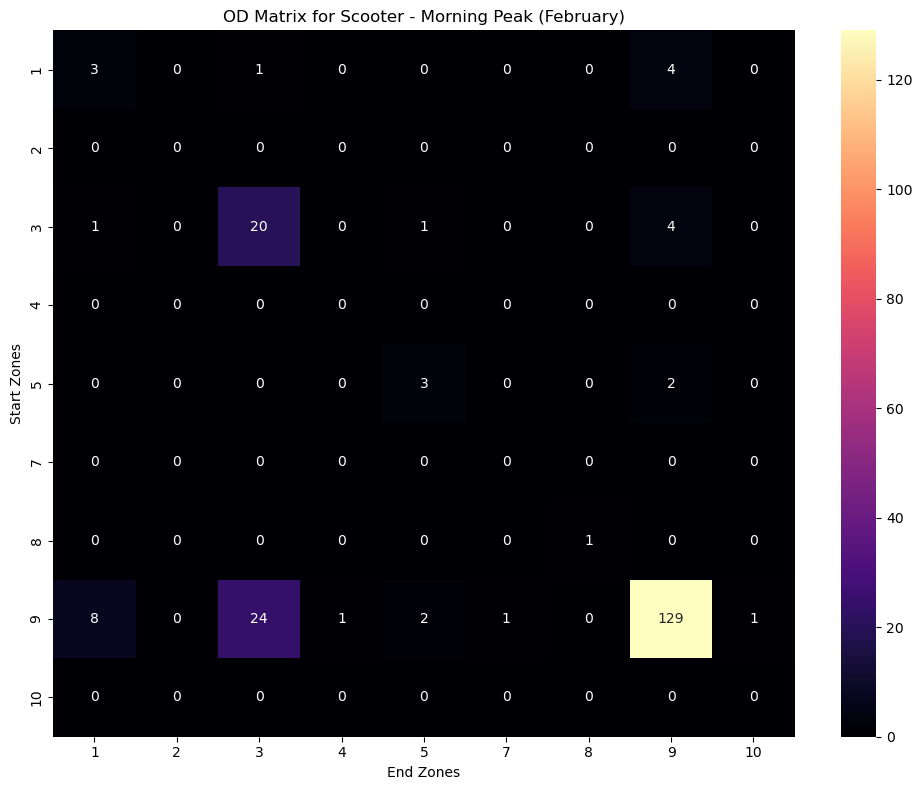

OD Matrix for Scooter - Evening Peak (October):

     1   2    3   4    5   7   8     9   10
1   121   0   39   0    2   0   0   207   0
2     0   5    2   0    0   0   0     0   0
3    51   3  466   0   10   0   2   242   1
4     0   0    0   4    0   0   0     5   0
5     4   0    9   0  115   0  13   107   1
7     1   0    0   2    0   5   0     0   1
8     1   0    0   0   11   0  11    19   0
9   203   0  252   4  140   6  21  3862  27
10    0   0    0   3    0   1   0     9   6

--------------------------------------------------



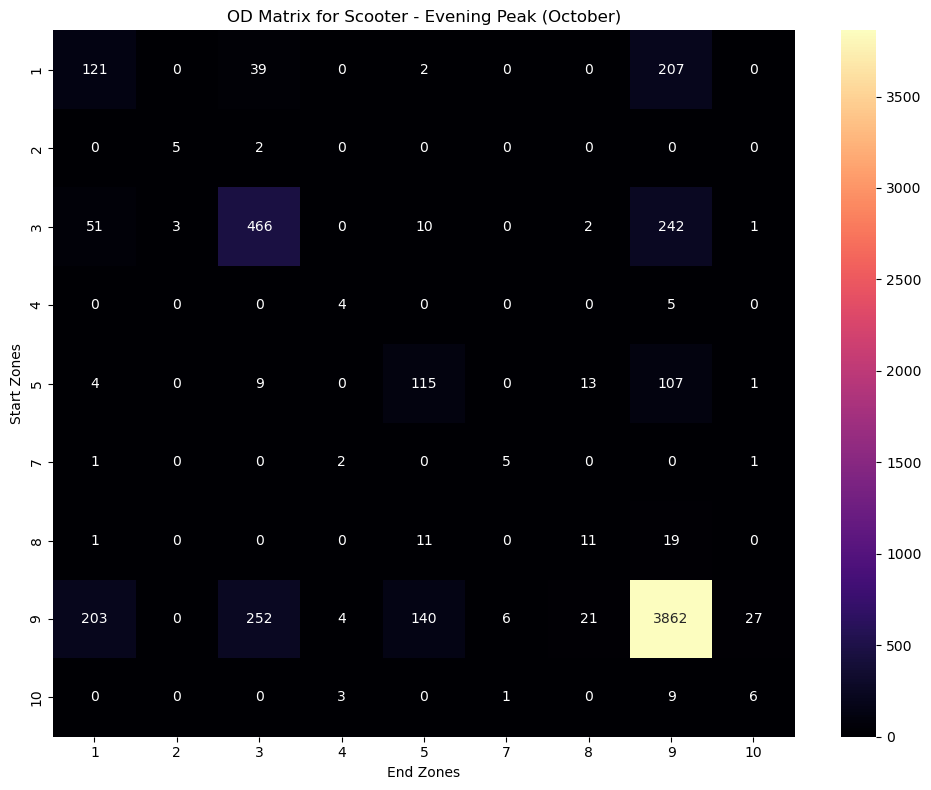

OD Matrix for Scooter - Evening Peak (December):

     1   2    3   4   5   7   8     9   10
1    91   0   34   1   3   0   0   149   0
2     0   2    0   0   0   0   0     0   0
3    38   1  338   0   4   0   0   188   0
4     1   0    0   0   0   0   0     1   0
5     1   1    4   0  72   0   9    55   1
7     0   0    0   0   0   2   0     2   0
8     0   0    0   0  14   0  11     6   2
9   130   0  165   5  66   4  13  2259   3
10    0   0    0   0   0   0   0     4   5

--------------------------------------------------



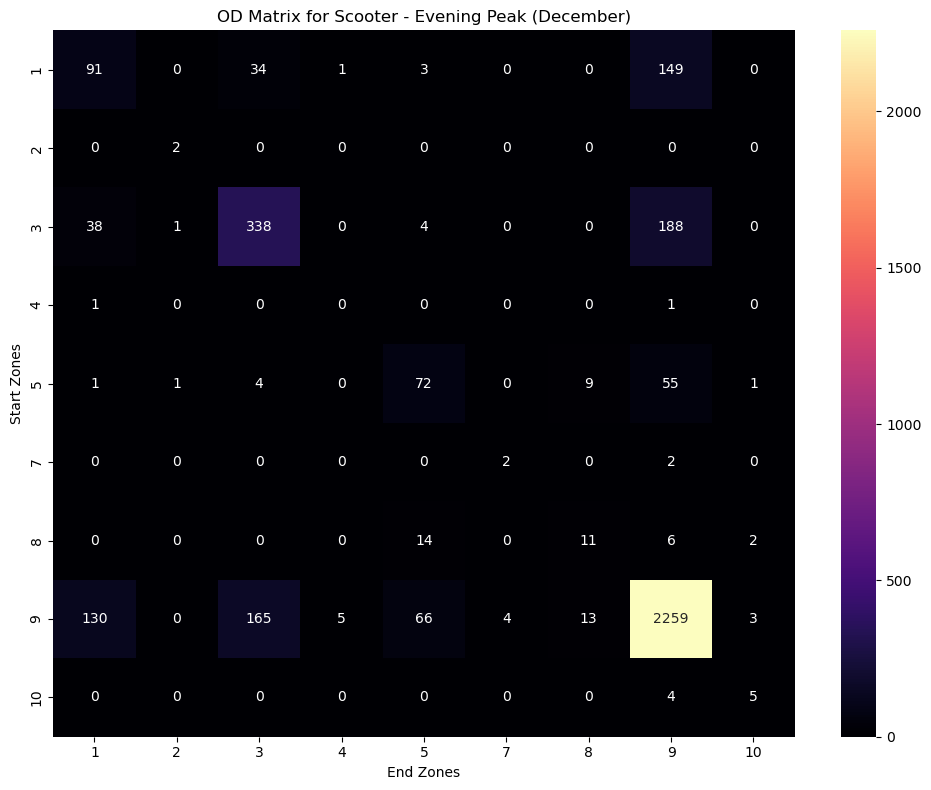

OD Matrix for Scooter - Evening Peak (February):

    1   2   3   4   5   7   8    9   10
1   25   0  10   0   0   0   0   26   0
2    0   0   0   0   0   0   0    0   0
3   23   1  89   0   0   0   0   45   0
4    0   0   0   0   0   0   0    0   0
5    1   0   1   0  15   0   4    5   0
7    0   0   0   0   0   2   0    0   0
8    0   0   0   0   0   0   1    0   0
9   26   1  38   2  13   0   2  680   1
10   0   0   0   0   0   0   0    2   1

--------------------------------------------------



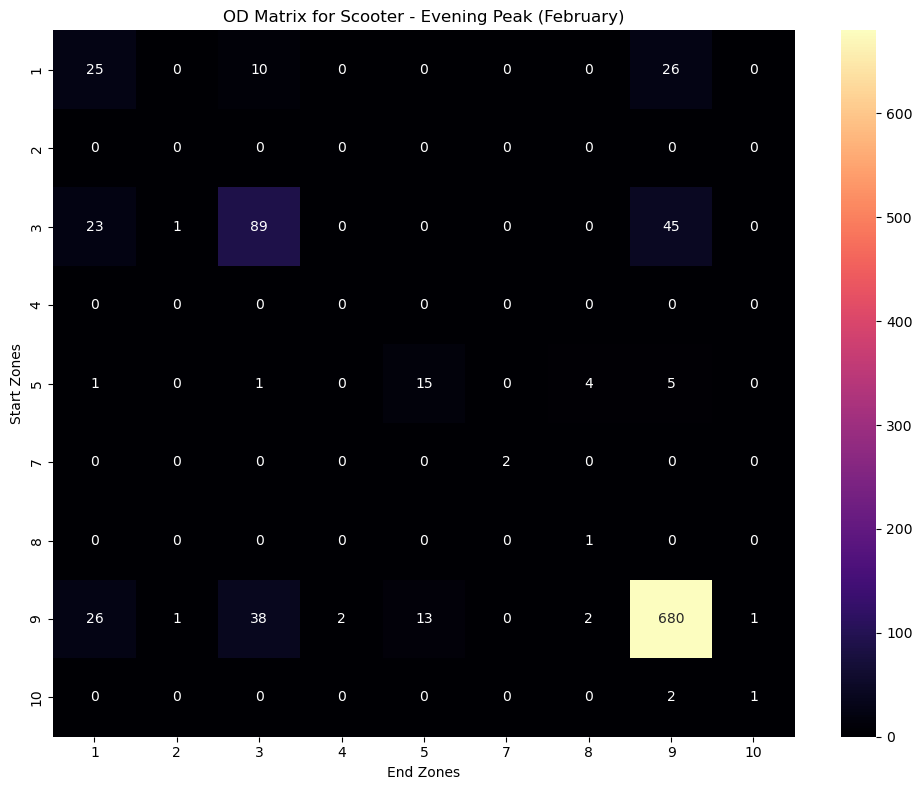

OD Matrix for Bicycle - Morning Peak (October):

    1   2   3   4   5   7   8   9   10
1    0   0   0   0   0   0   0   1   0
2    0   0   0   0   0   0   0   0   0
3    0   0   4   0   0   0   0   0   0
4    0   0   0   0   0   0   0   0   0
5    0   0   0   0   0   0   0   0   0
7    0   0   0   0   0   0   0   0   0
8    0   0   0   0   0   0   0   0   0
9    0   0   1   1   0   0   0   8   0
10   0   0   0   0   0   0   0   0   0

--------------------------------------------------



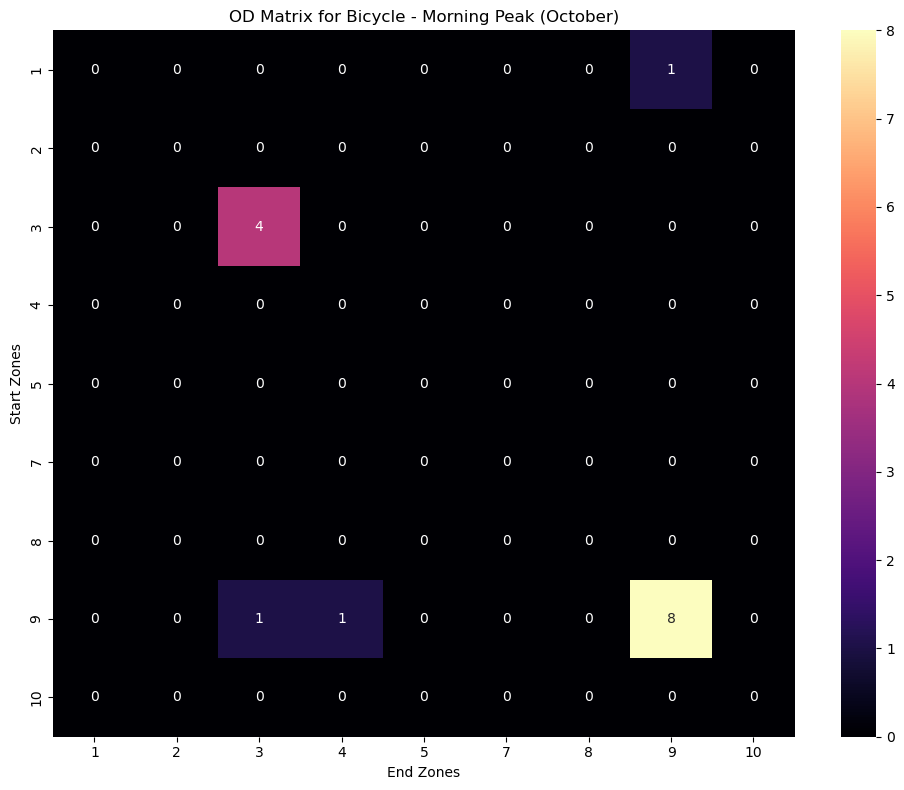

OD Matrix for Bicycle - Morning Peak (December):

    1   2   3   4   5   7   8   9   10
1    0   0   0   0   0   0   0   0   0
2    0   0   0   0   0   0   0   0   0
3    1   1   3   0   0   0   0   0   0
4    0   0   0   0   0   1   0   0   0
5    0   0   0   0   0   0   0   0   0
7    0   0   0   0   0   1   0   0   0
8    0   0   0   0   0   0   0   0   0
9    1   0   1   0   3   0   0   8   0
10   0   0   0   0   0   1   0   0   0

--------------------------------------------------



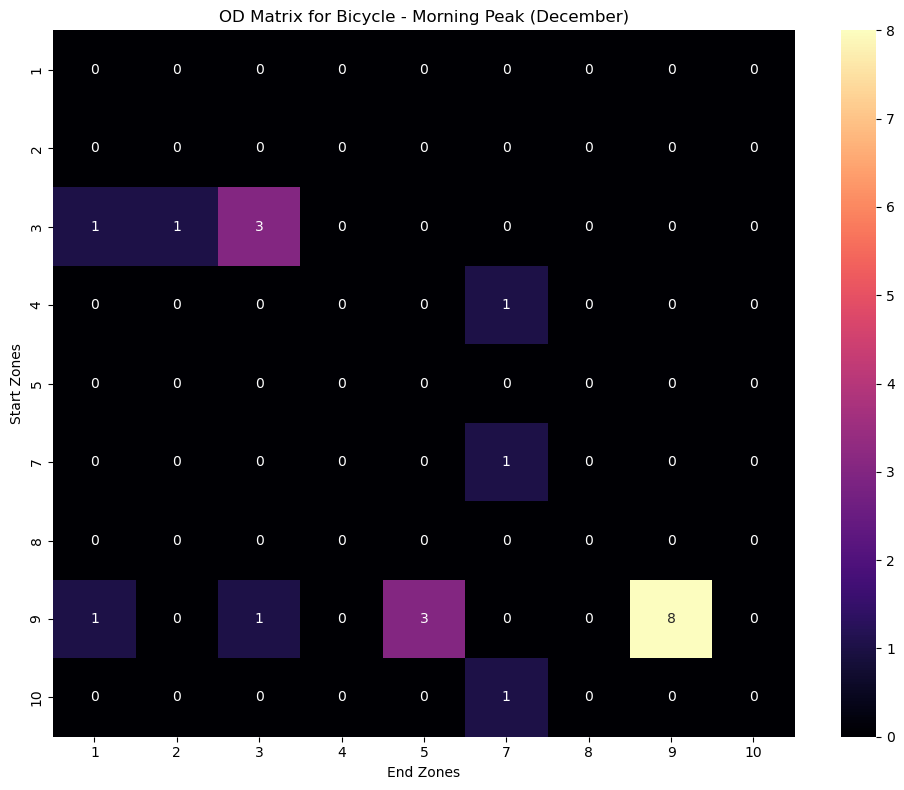

OD Matrix for Bicycle - Morning Peak (February):

    1   2   3   4   5   7   8   9   10
1    0   0   0   0   0   0   0   0   0
2    0   0   0   0   0   0   0   0   0
3    0   0   3   0   0   0   0   0   0
4    0   0   0   0   0   0   0   0   0
5    0   0   0   0   0   0   0   0   0
7    0   0   0   0   0   0   0   0   0
8    0   0   0   0   0   0   0   0   0
9    0   0   1   0   0   0   0   0   0
10   0   0   0   0   0   0   0   0   0

--------------------------------------------------



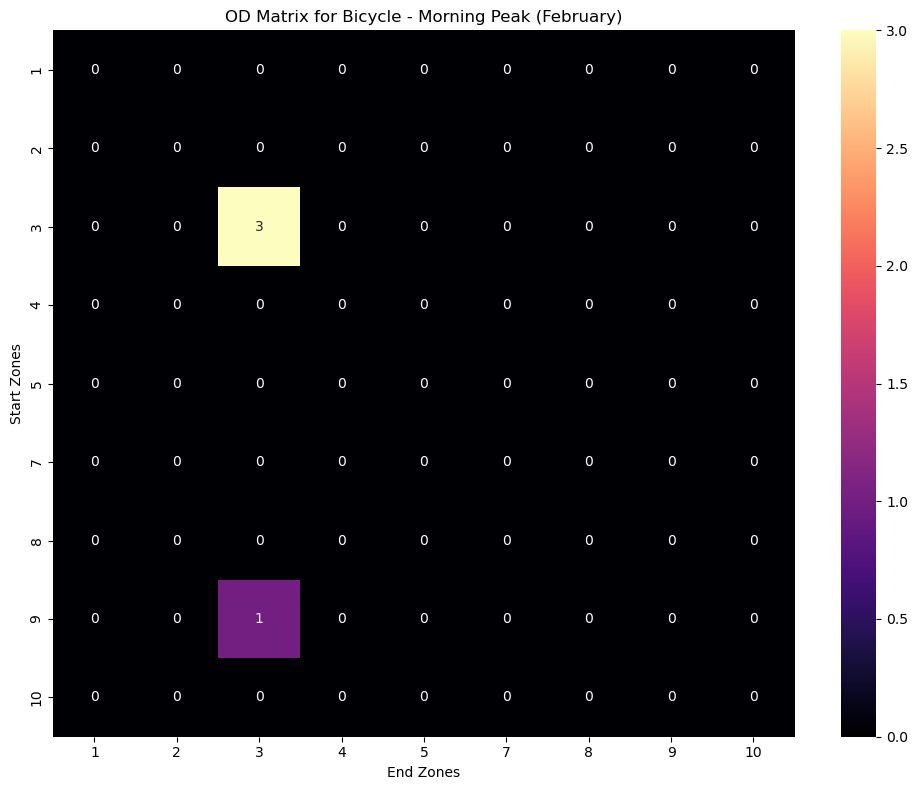

OD Matrix for Bicycle - Evening Peak (October):

    1   2   3   4   5   7   8   9   10
1    4   0   2   0   0   0   0   1   0
2    0   0   1   0   0   0   0   0   0
3    4   1  20   0   0   0   1   8   0
4    0   0   0   2   0   0   0   0   0
5    0   0   3   0   5   0   0   2   1
7    0   0   0   1   0   1   0   0   0
8    0   0   0   0   0   0   2   0   0
9    1   0   6   0   2   1   0  38   2
10   0   0   1   0   1   0   0   0   3

--------------------------------------------------



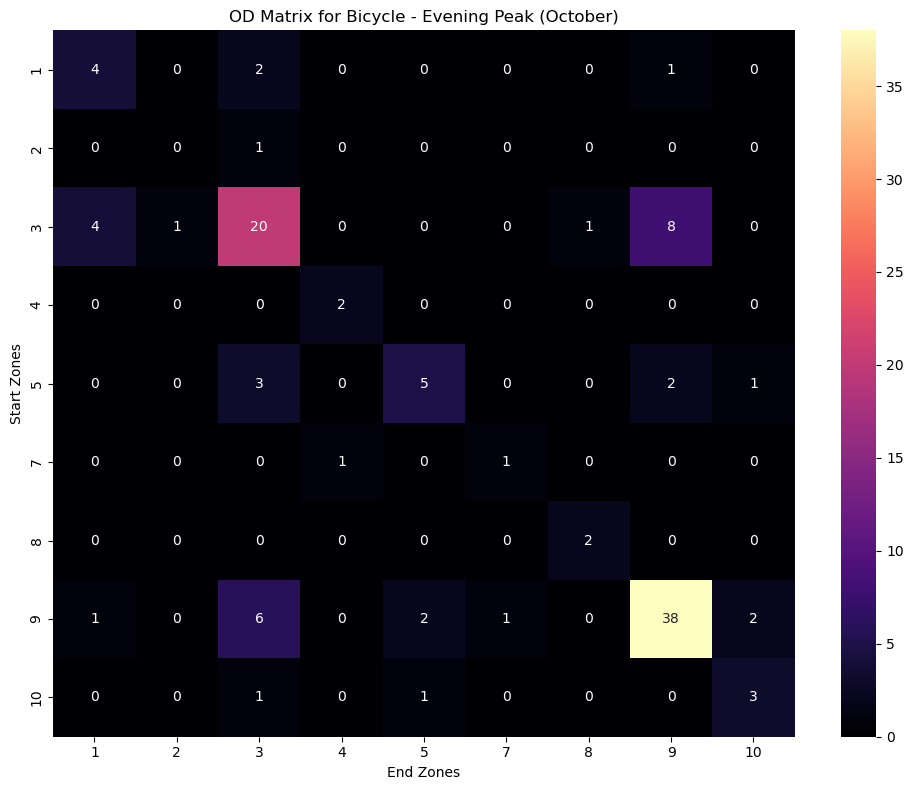

OD Matrix for Bicycle - Evening Peak (December):

    1   2   3   4   5   7   8   9   10
1    5   0   2   1   0   0   0   2   0
2    0   3   0   0   0   0   0   0   0
3    0   0   9   0   0   0   0   4   0
4    0   0   0   2   0   0   0   0   0
5    0   0   0   0   4   0   0   2   0
7    0   0   0   0   0   0   0   0   0
8    0   0   0   0   0   0   0   0   0
9    6   1   4   0   2   0   2  21   0
10   0   0   0   0   0   0   0   0   0

--------------------------------------------------



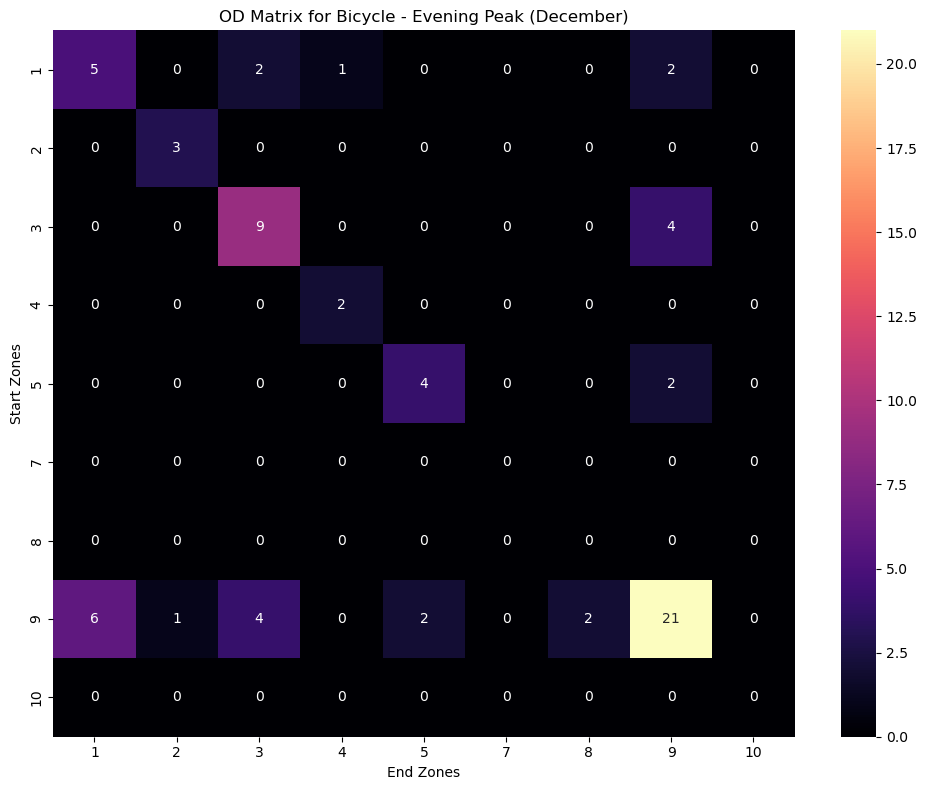

OD Matrix for Bicycle - Evening Peak (February):

    1   2   3   4   5   7   8   9   10
1    3   0   1   0   0   0   0   1   0
2    0   0   0   0   0   0   0   0   0
3    0   0   0   0   0   0   0   2   0
4    0   0   0   0   0   0   0   0   0
5    0   0   0   0   3   0   0   0   0
7    0   0   0   0   0   1   0   0   0
8    0   0   0   0   0   0   0   0   0
9    0   0   1   1   2   0   1  21   0
10   0   0   0   0   0   0   0   0   0

--------------------------------------------------



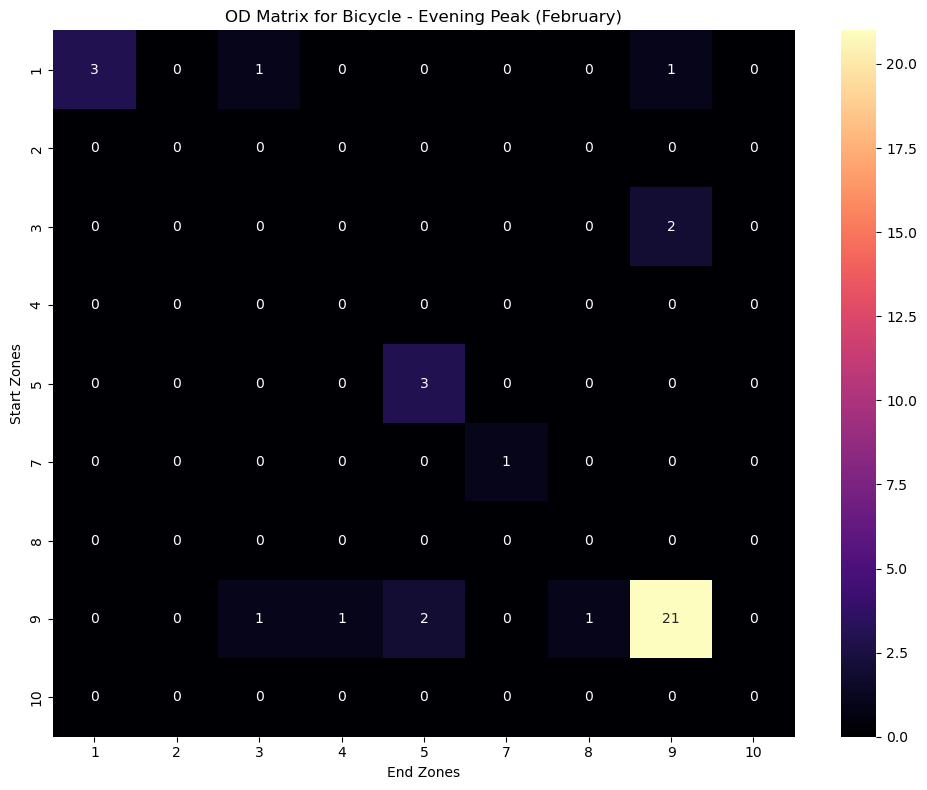

In [79]:
#******question three******
#visualiseselected OD matrices that show some trends/periodicity on a map
#To better compare the data, we displayed three months of data in the form of an OD matrix

# Define peak hours and updated months
peak_hours = {
    "Morning": range(7, 10),  # 7 AM to 9 AM
    "Evening": range(17, 20)  # 5 PM to 7 PM
}
months = {'October': 10, 'December': 12, "February": 2}  # Updated months
vehicle_types = ['scooter', 'bicycle']  # Use lowercase for filtering

# Filter and generate OD matrices for each condition
for vehicle in vehicle_types:
    for time_period, hours in peak_hours.items():
        for month_name, month_num in months.items():
            # Filter data for specific vehicle type, time period, and month
            filtered_data = df_cleaned[
                (df_cleaned['Vehicle Type'] == vehicle) &
                (df_cleaned['Start Time'].dt.month == month_num) &
                (df_cleaned['Start Time'].dt.hour.isin(hours))
            ]

            # Check if filtered data is empty
            if filtered_data.empty:
                print(f"No data for {vehicle} - {time_period} Peak ({month_name})")
                continue

            # Generate OD matrix for filtered data
            matrix_filtered = (
                filtered_data.assign(count=1)
                .pivot_table(index="Council District (Start)", 
                             columns="Council District (End)",
                             values="count", aggfunc="count")
                .fillna(0)
                .astype(int)
            )

            # Align with overall matrix structure
            matrix_filtered = matrix_filtered.reindex(index=matrix.index, columns=matrix.columns, fill_value=0)

            # Display the matrix in the console
            print(f"OD Matrix for {vehicle.capitalize()} - {time_period} Peak ({month_name}):\n")
            print(matrix_filtered)
            print("\n" + "-"*50 + "\n")

            # Plot the heatmap
            plt.figure(figsize=(10, 8))
            sns.heatmap(matrix_filtered, annot=True, fmt="d", cmap="magma", cbar=True)

            # Add title and labels
            plt.title(f"OD Matrix for {vehicle.capitalize()} - {time_period} Peak ({month_name})")
            plt.xlabel("End Zones")
            plt.ylabel("Start Zones")

            # Show the plot
            plt.tight_layout()
            plt.show()


In [81]:
#Analysis display based on vehicle type for two different years
# Create a dictionary to store matrices for each vehicle type and year

vehicle_year_matrices = {}

# Ensure the 'Year' column exists and is correctly formatted
if 'Year' not in df_cleaned.columns:
    df_cleaned['Year'] = pd.to_datetime(df_cleaned['Date']).dt.year  # Assuming a 'Date' column exists

# Group the data by 'Year' and 'Vehicle Type'
for (year, vehicle_type), group in df_cleaned.groupby(['Year', 'Vehicle Type']):
    # Create a matrix for the current vehicle type and year
    matrix = (
        group.assign(count=1)
        .pivot_table(
            index="Council District (Start)", 
            columns="Council District (End)",
            values="count", 
            aggfunc="count"
        )
        .fillna(0)
        .astype(int)
        .sort_index()
    )
    
    # Store the matrix in the dictionary using a (year, vehicle_type) tuple as the key
    vehicle_year_matrices[(year, vehicle_type)] = matrix

# Print matrices for each year and vehicle type (optional)
for (year, vehicle_type), matrix in vehicle_year_matrices.items():
    print(f"Matrix for {vehicle_type} in {year}:\n", matrix)
    print(f"********************************************************")

# Example: Access the matrix for a specific year and vehicle type
specific_year = 2023
specific_vehicle_type = "Car"
if (specific_year, specific_vehicle_type) in vehicle_year_matrices:
    specific_matrix = vehicle_year_matrices[(specific_year, specific_vehicle_type)]
    print(f"\nSpecific Matrix for {specific_vehicle_type} in {specific_year}:\n", specific_matrix)

Matrix for bicycle in 2021.0:
 Council District (End)    1.0   2.0   3.0   4.0   5.0   7.0   8.0   9.0   10.0
Council District (Start)                                                      
1.0                        199     0   139     4     2     0     1   184     0
2.0                          0   127    37     0     5     0     3     6     0
3.0                        146    38  1040     0    35     0    11   395     3
4.0                          5     0     0    45     1     7     0    11     2
5.0                          3     7    33     0   229     0    14   153     1
7.0                          0     0     0     5     0    31     0     9     2
8.0                          0     0     0     0    19     0    38    36     0
9.0                        195    10   404    20   144     7    33  2332    36
10.0                         1     0     2     0     3     6     2    31    29
********************************************************
Matrix for moped in 2021.0:
 Council Distri

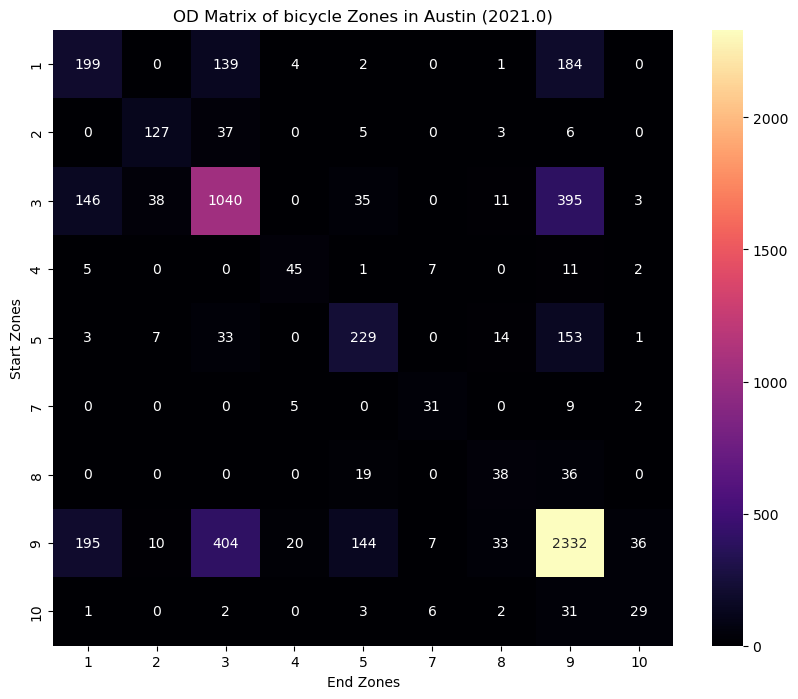

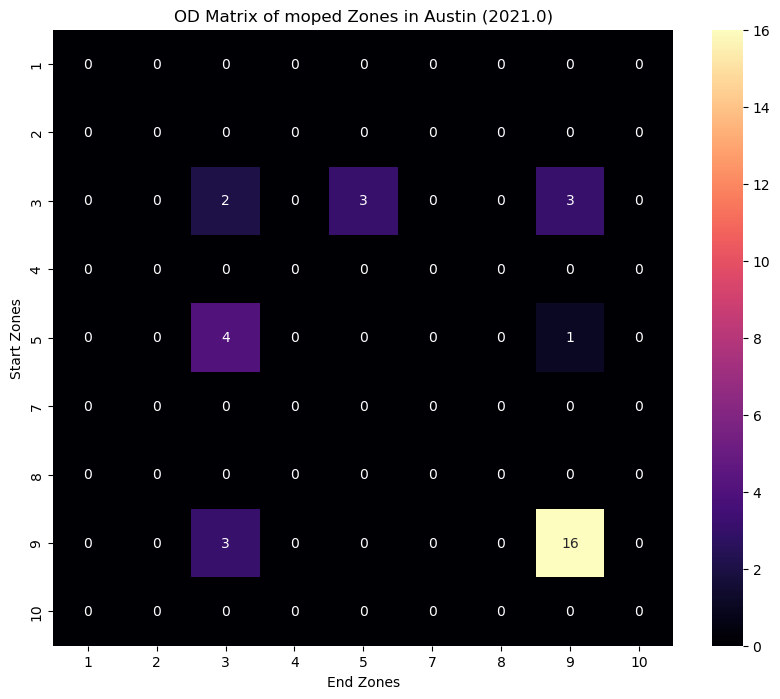

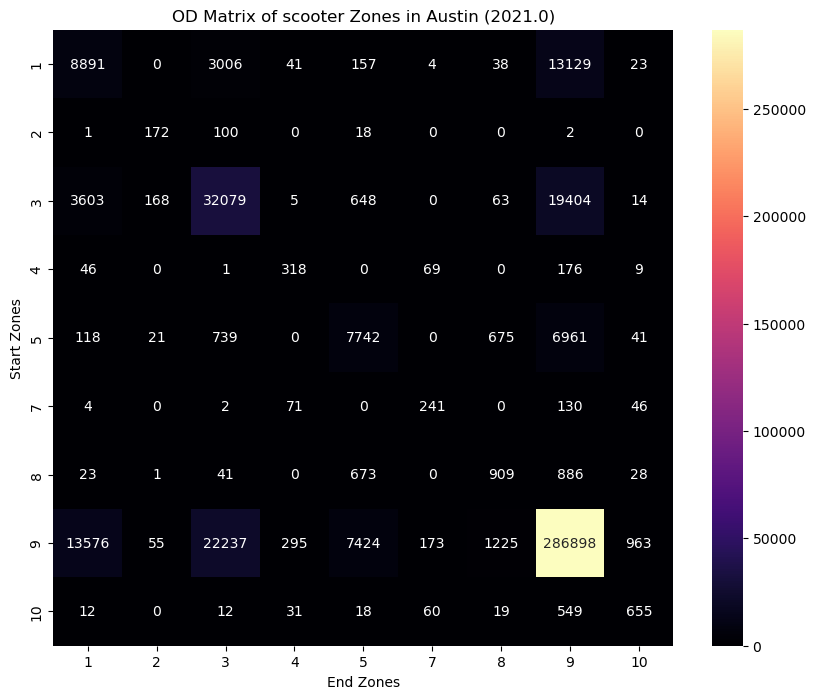

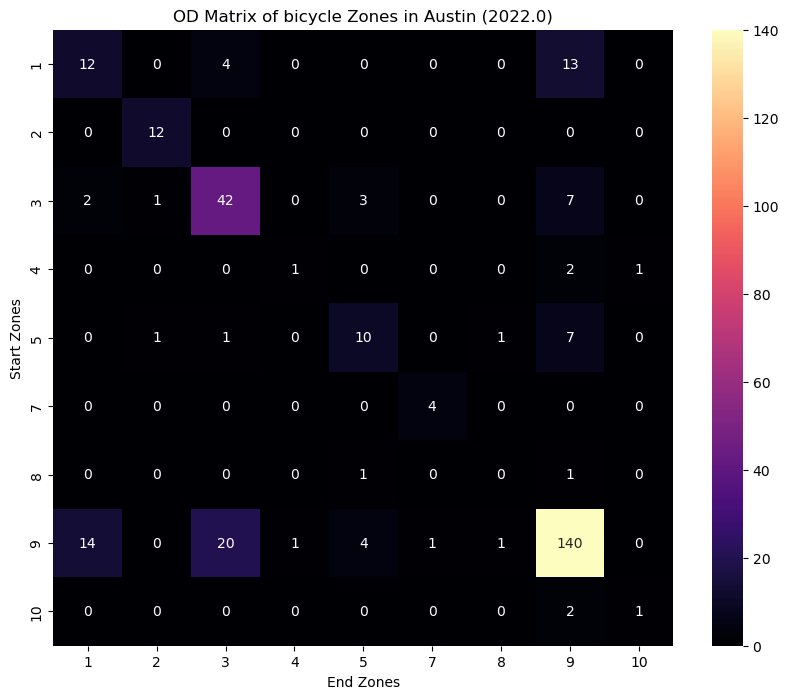

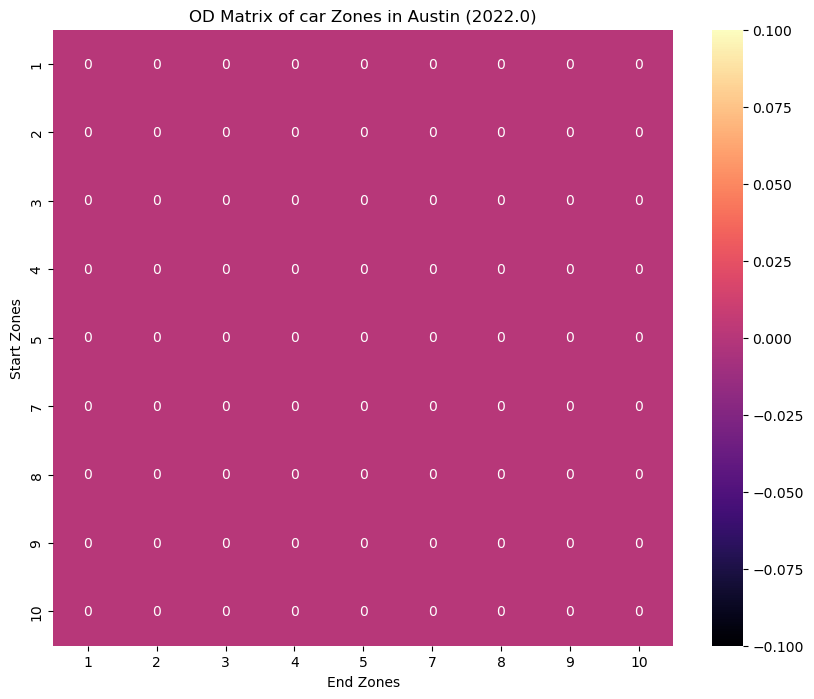

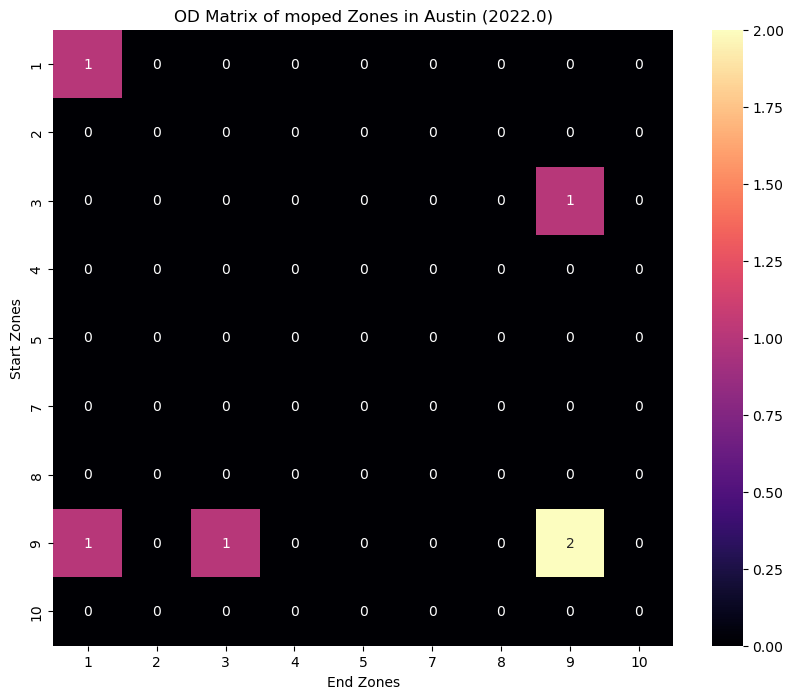

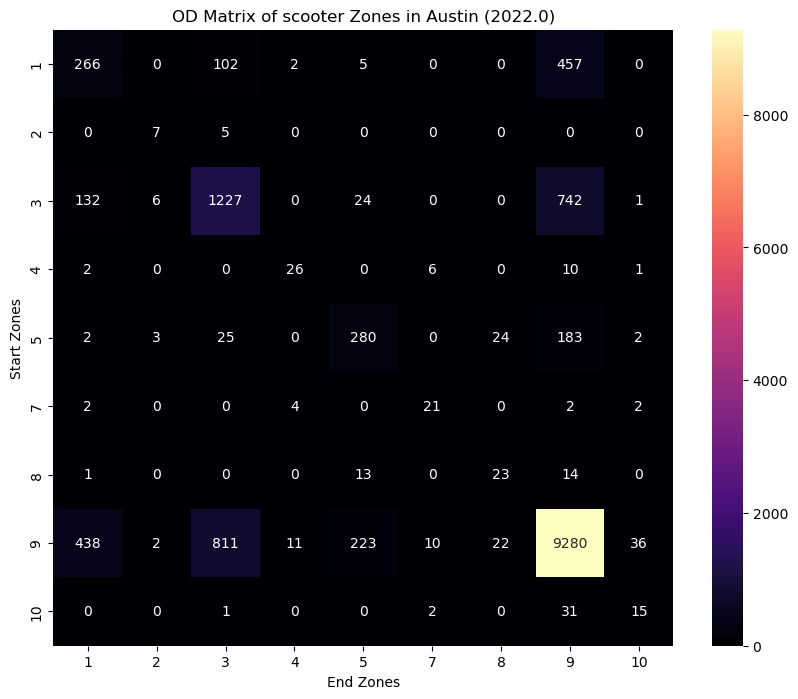

In [85]:
#Display the above matrices as heatmaps for better understanding

# Set up index and columns for the base matrix (zone labels)
zone_labels = [1, 2, 3, 4, 5, 7, 8, 9, 10]  # Adjust as necessary for your zones

# Assuming vehicle_year_matrices is already populated as you described
# Loop through each (year, vehicle_type) combination in the matrix dictionary
for (year, vehicle_type), matrix in vehicle_year_matrices.items():
    # Ensure the matrix has consistent index/columns (using zone_labels)
    matrix = matrix.reindex(index=zone_labels, columns=zone_labels, fill_value=0)
    
    # Plot the heatmap for each vehicle type and year
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="magma", cbar=True)
    
    # Add title and labels including the year and vehicle type
    plt.title(f"OD Matrix of {vehicle_type} Zones in Austin ({year})")
    plt.xlabel("End Zones")
    plt.ylabel("Start Zones")
    
    # Show the plot
    plt.show()

In [87]:
#now we start to remove the outlier and do again 

In [93]:
#OD matrix without outlier

import pandas as pd
import numpy as np
from scipy.stats import zscore

# Assuming your matrix is already created
matrix = (
    df_cleaned.assign(count=1)
    .pivot_table(index="Council District (Start)", columns="Council District (End)",
                 values="count", aggfunc="count")
    .fillna(0)
    .astype(int)
).sort_values("Council District (Start)")

# Step 1: Convert the matrix into a long-form DataFrame
matrix_long = matrix.reset_index().melt(id_vars=["Council District (Start)"], 
                                        var_name="Council District (End)", 
                                        value_name="count")

# Step 2: Calculate Z-scores
matrix_long["z_score"] = zscore(matrix_long["count"])

# Step 3: Identify and handle outliers
# Replace outliers (absolute Z-score > 3) with NaN
matrix_long["count"] = np.where(
    matrix_long["z_score"].abs() > 3, 
    np.nan,  # Replace with NaN (can also use 0 or other values if preferred)
    matrix_long["count"]
)

# Step 4: Drop the z_score column as it's no longer needed
matrix_long = matrix_long.drop(columns=["z_score"])

# Step 5: Rebuild the cleaned matrix
cleaned_matrix = matrix_long.pivot_table(
    index="Council District (Start)", 
    columns="Council District (End)", 
    values="count"
).fillna(0).astype(int)

# Display the cleaned matrix
cleaned_matrix

Council District (End),1.0,2.0,3.0,4.0,5.0,7.0,8.0,9.0,10.0
Council District (Start),,,,,,,,,
1.0,9369,0,3251,47,164,4,39,13783,23
2.0,1,318,142,0,23,0,3,8,0
3.0,3883,213,34390,5,713,0,74,20552,18
4.0,53,0,1,390,1,82,0,199,13
5.0,123,32,802,0,8261,0,714,7305,44
7.0,6,0,2,80,0,297,0,141,50
8.0,24,1,41,0,706,0,970,937,28
9.0,14224,67,23476,327,7795,191,1281,0,1035
10.0,13,0,15,31,21,68,21,613,700


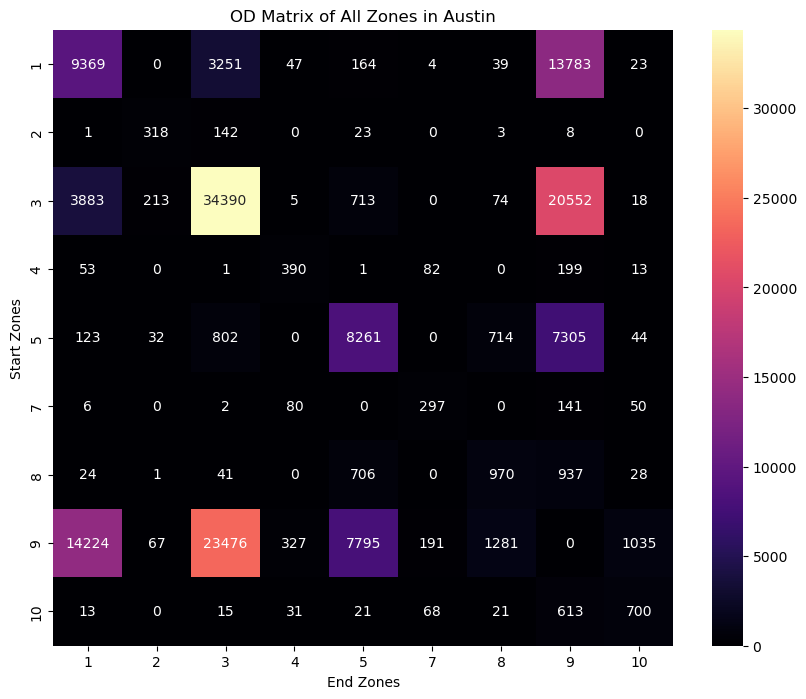

In [95]:
cleaned_matrix.index = [1, 2, 3, 4, 5, 7, 8, 9, 10]  # Start Zones
cleaned_matrix.columns = [1, 2, 3, 4, 5, 7, 8, 9, 10]  # End Zones

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cleaned_matrix, annot=True, fmt="d", cmap="magma", cbar=True)

# Add title and labels
plt.title("OD Matrix of All Zones in Austin")
plt.xlabel("End Zones")
plt.ylabel("Start Zones")

# Show the plot
plt.show()


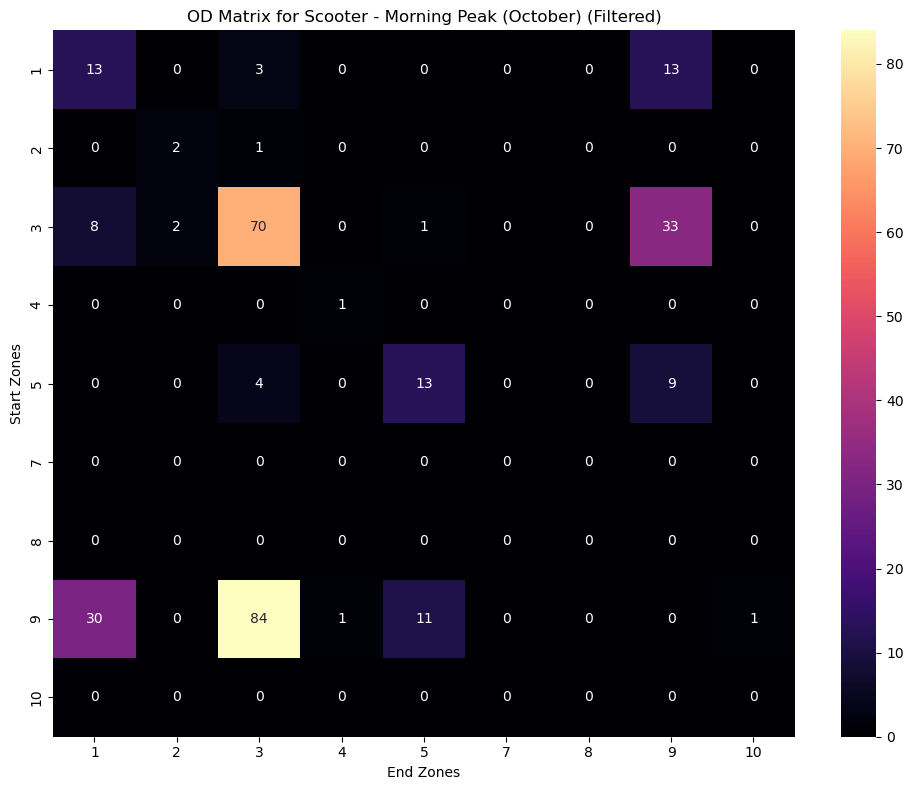

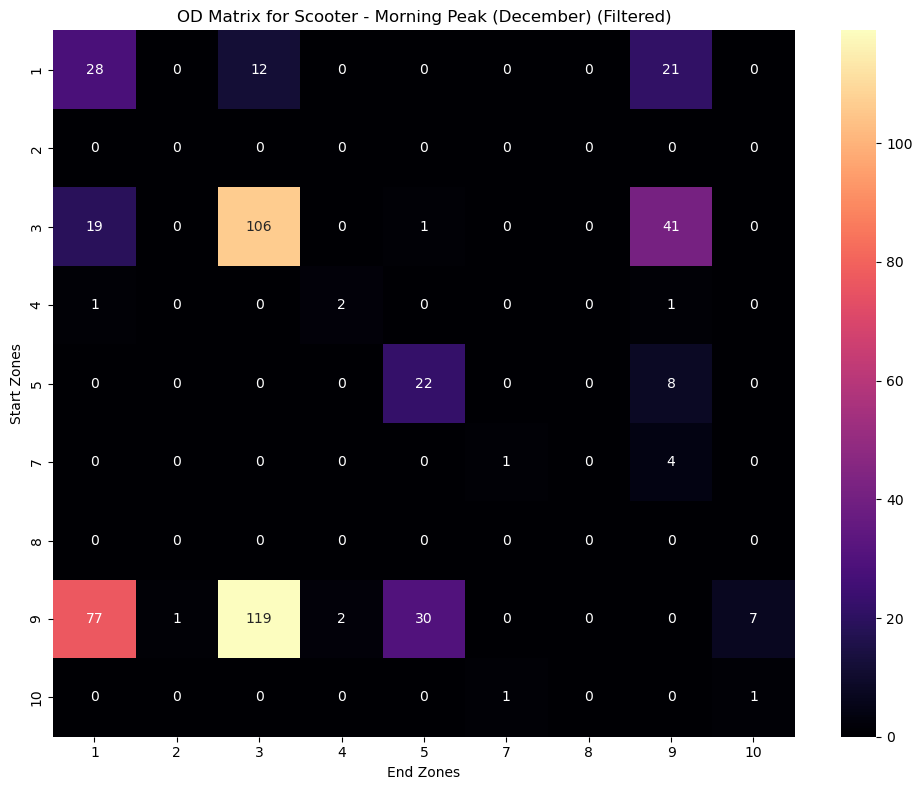

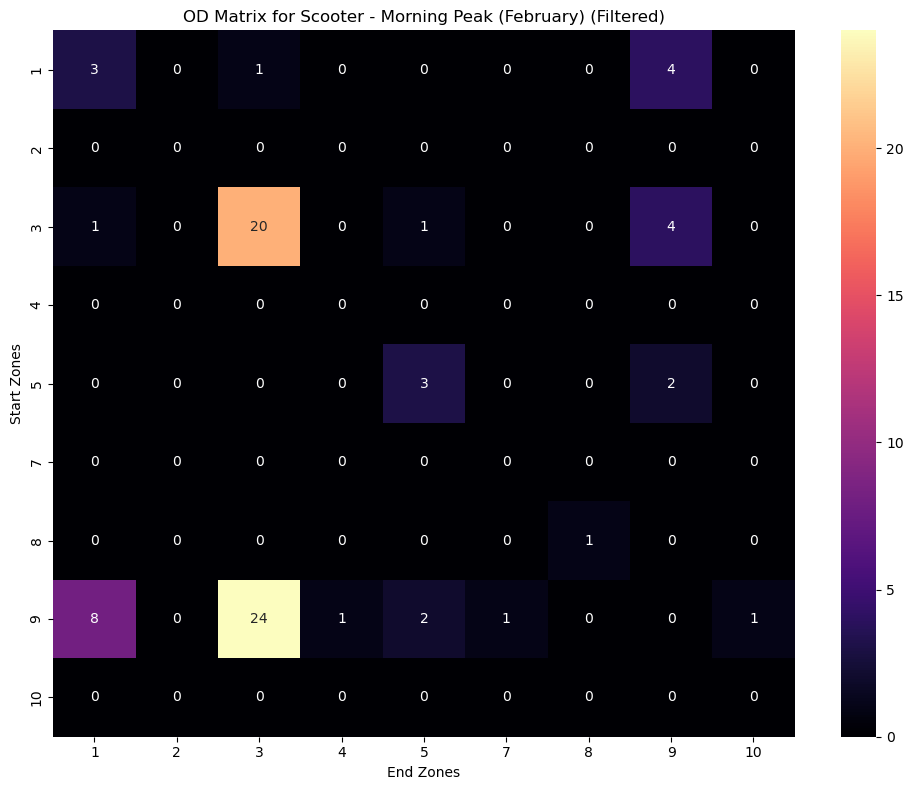

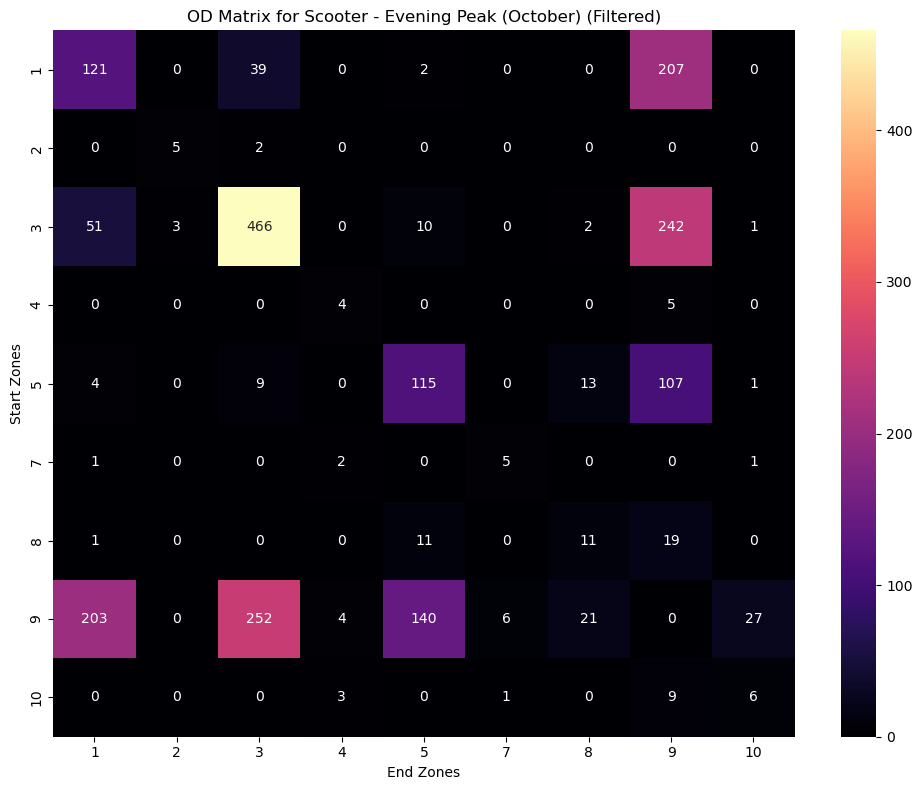

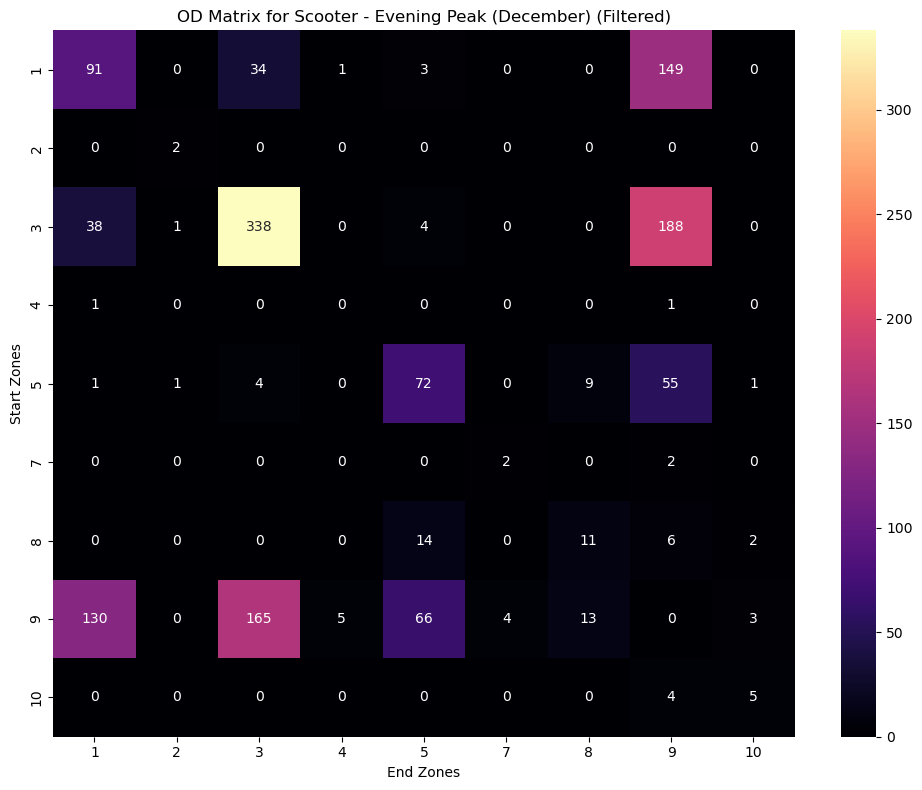

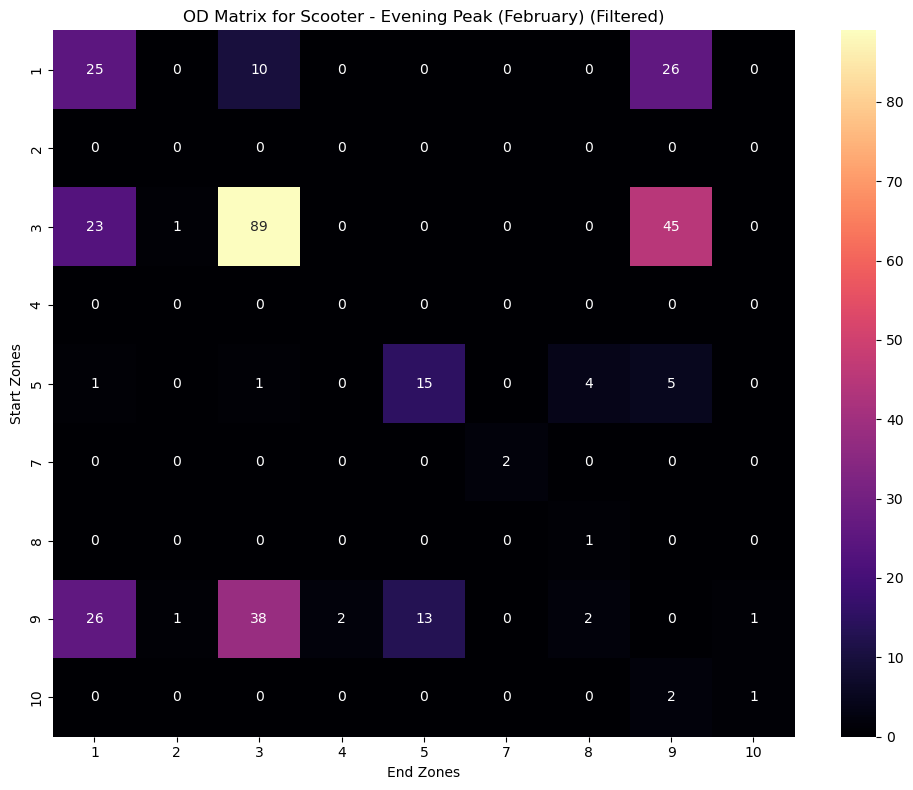

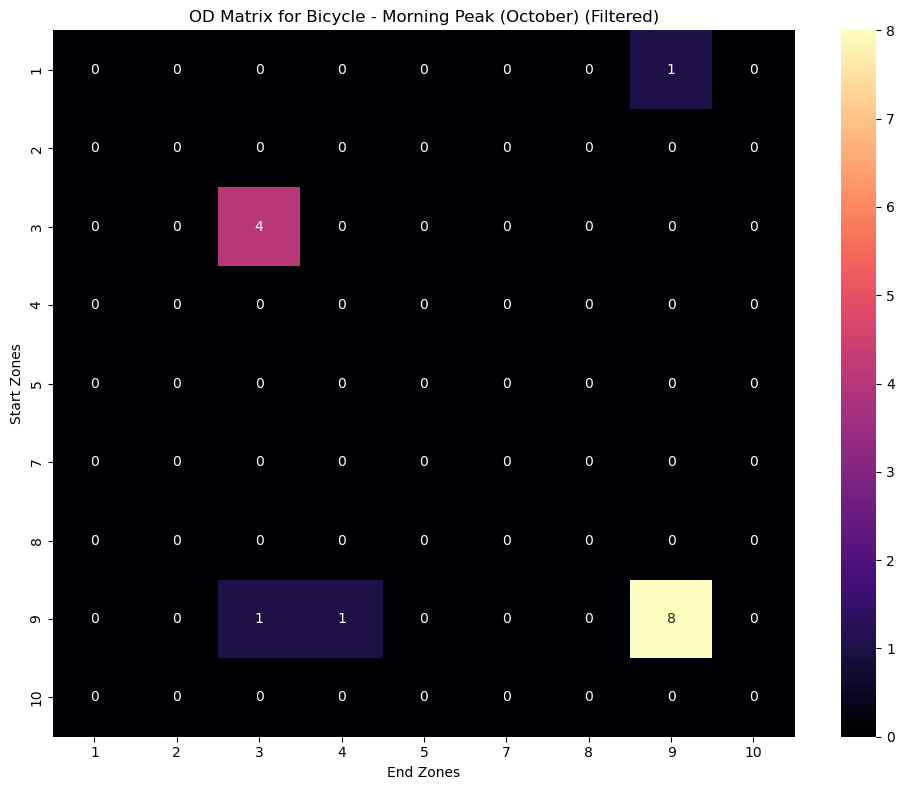

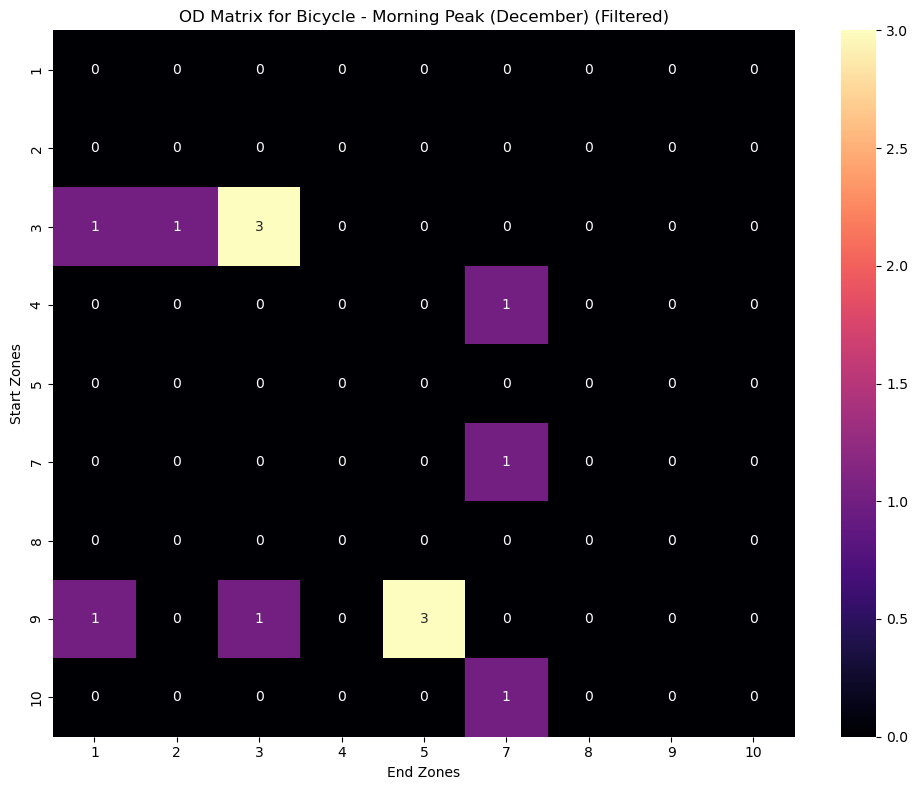

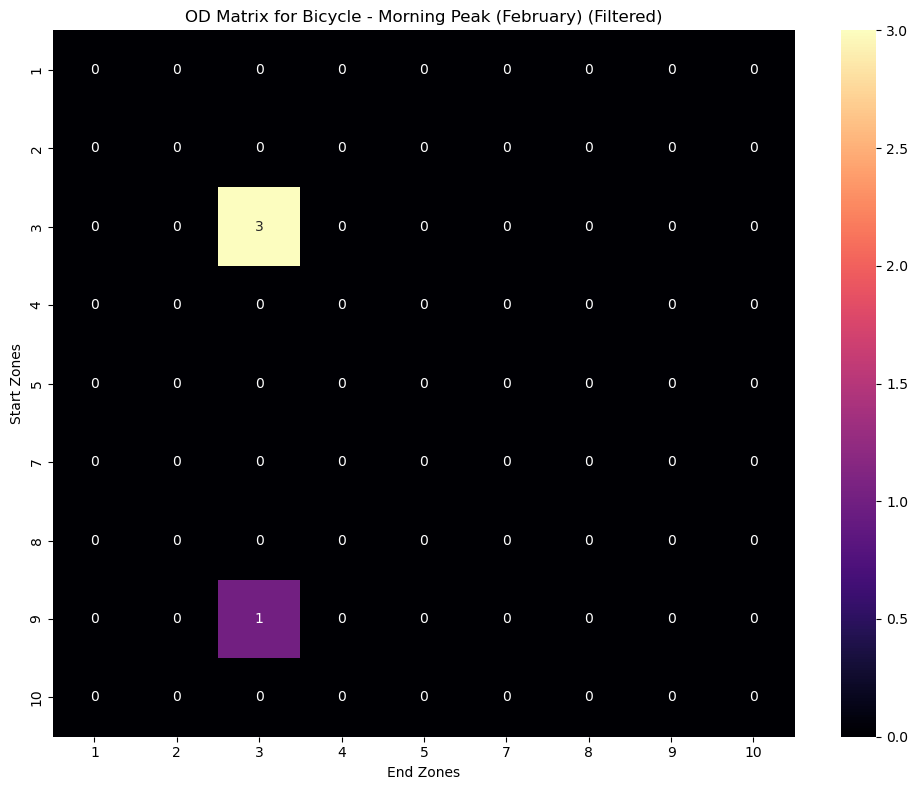

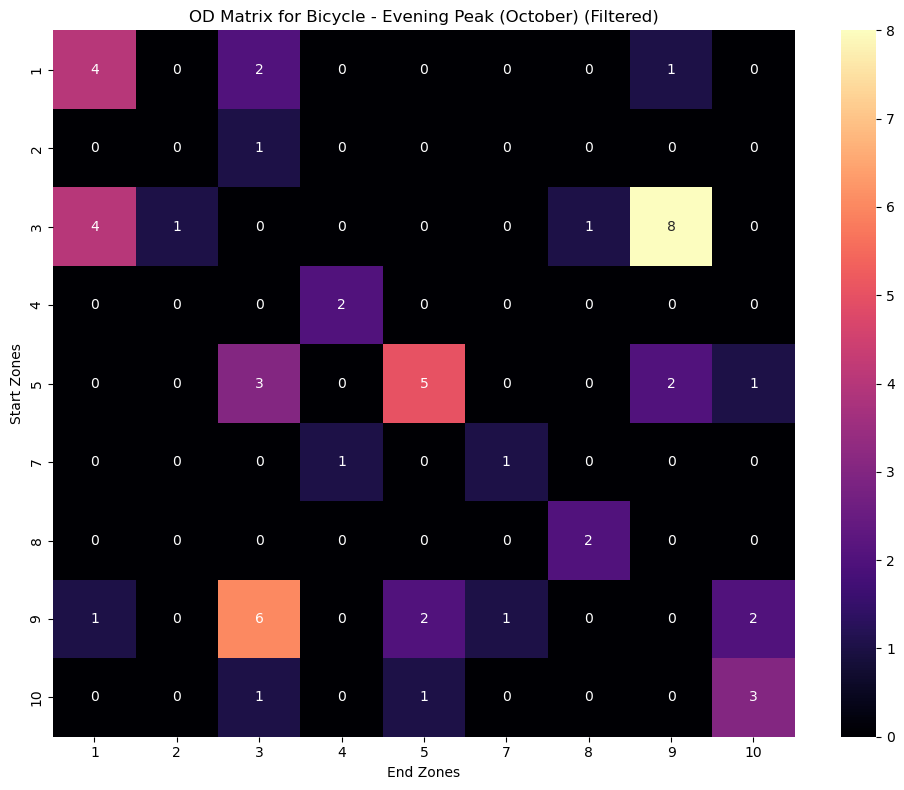

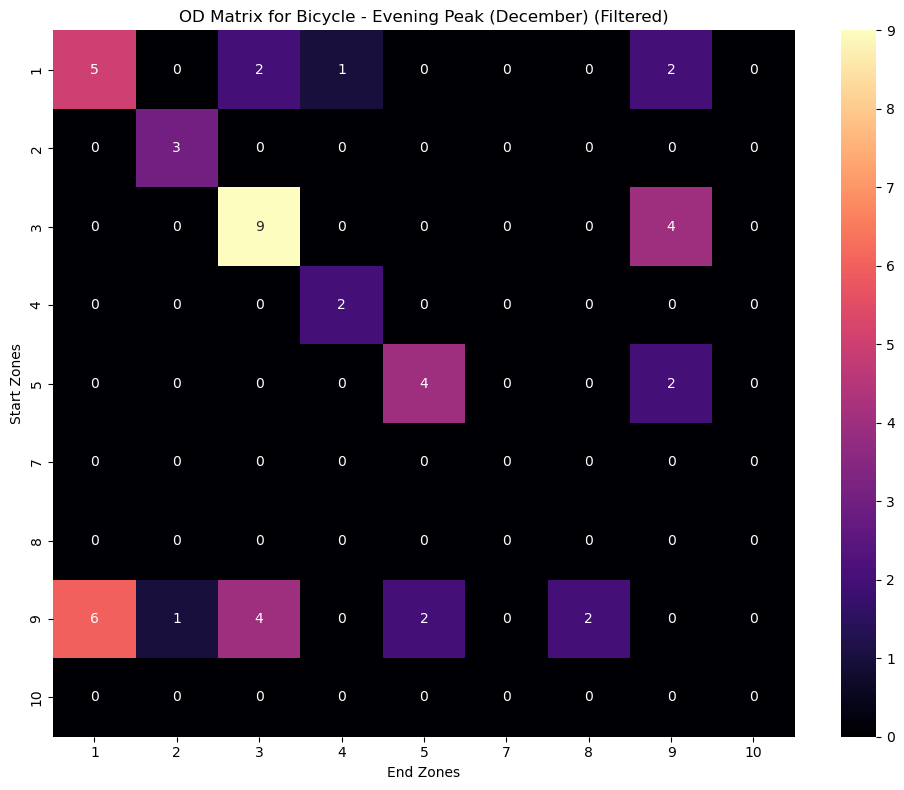

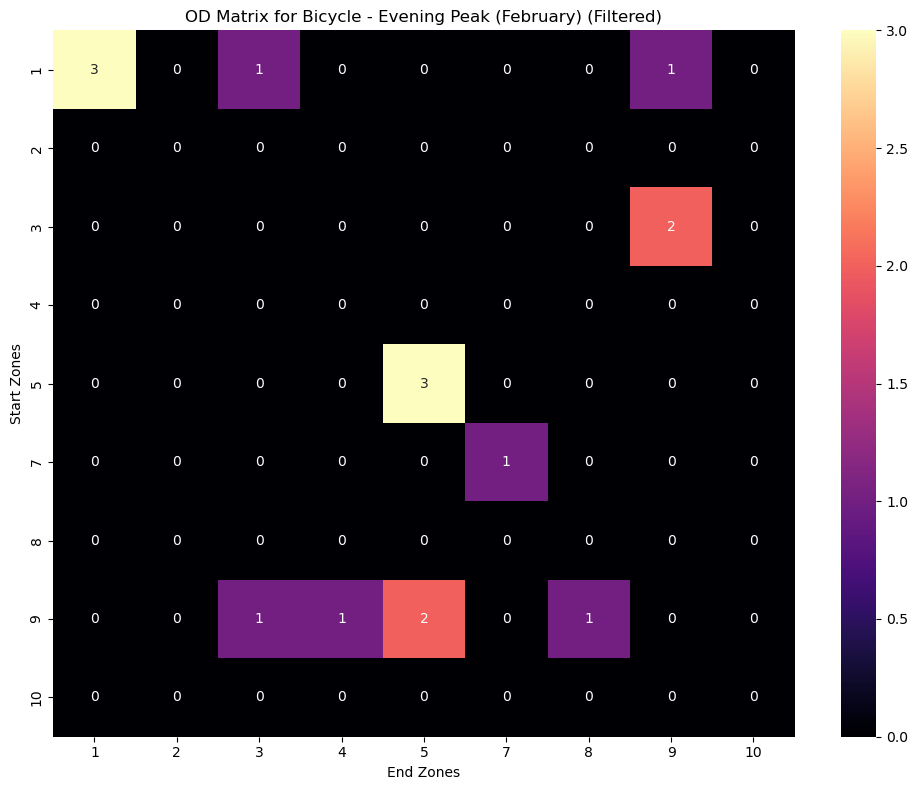

In [99]:
# Define peak hours and updated months
peak_hours = {
    "Morning": range(7, 10),  # 7 AM to 9 AM
    "Evening": range(17, 20)  # 5 PM to 7 PM
}
months = {'October': 10, 'December': 12,"February":2}  # Updated months
vehicle_types = ['scooter', 'bicycle']  # Use lowercase for filtering

# Filter and generate OD matrices for each condition
for vehicle in vehicle_types:
    for time_period, hours in peak_hours.items():
        for month_name, month_num in months.items():
            # Filter data for specific vehicle type, time period, and month
            filtered_data = df_cleaned[
                (df_cleaned['Vehicle Type'] == vehicle) &
                (df_cleaned['Start Time'].dt.month == month_num) &
                (df_cleaned['Start Time'].dt.hour.isin(hours))
            ]

            # Check if filtered data is empty
            if filtered_data.empty:
                print(f"No data for {vehicle} - {time_period} Peak ({month_name})")
                continue

            # Generate OD matrix for filtered data
            filtered_matrix = (
                filtered_data.assign(count=1)
                .pivot_table(index="Council District (Start)", 
                             columns="Council District (End)",
                             values="count", aggfunc="count")
                .fillna(0)
                .astype(int)
            )

            # Apply Z-score outlier filtering
            matrix_long = filtered_matrix.reset_index().melt(
                id_vars=["Council District (Start)"], 
                var_name="Council District (End)", 
                value_name="count"
            )
            matrix_long["z_score"] = zscore(matrix_long["count"])
            matrix_long["count"] = np.where(
                matrix_long["z_score"].abs() > 3, 
                np.nan, 
                matrix_long["count"]
            )
            matrix_long = matrix_long.drop(columns=["z_score"])
            cleaned_filtered_matrix = matrix_long.pivot_table(
                index="Council District (Start)", 
                columns="Council District (End)", 
                values="count"
            ).fillna(0).astype(int)

            # Align with overall matrix structure
            cleaned_filtered_matrix = cleaned_filtered_matrix.reindex(
                index=cleaned_matrix.index, 
                columns=cleaned_matrix.columns, 
                fill_value=0
            )

            # Plot the heatmap
            plt.figure(figsize=(10, 8))
            sns.heatmap(cleaned_filtered_matrix, annot=True, fmt="d", cmap="magma", cbar=True)

            # Add title and labels
            plt.title(f"OD Matrix for {vehicle.capitalize()} - {time_period} Peak ({month_name}) (Filtered)")
            plt.xlabel("End Zones")
            plt.ylabel("Start Zones")

            # Show the plot
            plt.tight_layout()
            plt.show()

In [101]:

# Step 1: Ensure 'Year' column exists
if 'Year' not in df_cleaned.columns:
    df_cleaned['Year'] = pd.to_datetime(df_cleaned['Date']).dt.year  # Assuming a 'Date' column exists

# Step 2: Initialize a dictionary to store matrices
vehicle_year_matrices = {}

# Step 3: Group the data by 'Year' and 'Vehicle Type'
for (year, vehicle_type), group in df_cleaned.groupby(['Year', 'Vehicle Type']):
    # Step 4: Create the initial matrix for this group
    matrix = (
        group.assign(count=1)
        .pivot_table(
            index="Council District (Start)", 
            columns="Council District (End)",
            values="count", 
            aggfunc="count"
        )
        .fillna(0)
        .astype(int)
        .sort_index()
    )
    
    # Step 5: Convert to long form to detect and handle outliers
    matrix_long = matrix.reset_index().melt(
        id_vars=["Council District (Start)"], 
        var_name="Council District (End)", 
        value_name="count"
    )
    
    # Calculate Z-scores
    matrix_long["z_score"] = zscore(matrix_long["count"])
    
    # Replace outliers with NaN
    matrix_long["count"] = np.where(
        matrix_long["z_score"].abs() > 3,
        np.nan,  # Replace outliers with NaN
        matrix_long["count"]
    )
    
    # Drop the Z-score column
    matrix_long = matrix_long.drop(columns=["z_score"])
    
    # Rebuild the cleaned matrix
    cleaned_matrix = matrix_long.pivot_table(
        index="Council District (Start)", 
        columns="Council District (End)", 
        values="count"
    ).fillna(0).astype(int)
    
    # Step 6: Store the cleaned matrix in the dictionary
    vehicle_year_matrices[(year, vehicle_type)] = cleaned_matrix

# Step 7: Print the matrices (optional)
for (year, vehicle_type), matrix in vehicle_year_matrices.items():
    print(f"Matrix for {vehicle_type} in {year}:\n", matrix)
    print(f"********************************************************")

Matrix for bicycle in 2021.0:
 Council District (End)    1.0   2.0   3.0   4.0   5.0   7.0   8.0   9.0   10.0
Council District (Start)                                                      
1.0                        199     0   139     4     2     0     1   184     0
2.0                          0   127    37     0     5     0     3     6     0
3.0                        146    38     0     0    35     0    11   395     3
4.0                          5     0     0    45     1     7     0    11     2
5.0                          3     7    33     0   229     0    14   153     1
7.0                          0     0     0     5     0    31     0     9     2
8.0                          0     0     0     0    19     0    38    36     0
9.0                        195    10   404    20   144     7    33     0    36
10.0                         1     0     2     0     3     6     2    31    29
********************************************************
Matrix for moped in 2021.0:
 Council Distri

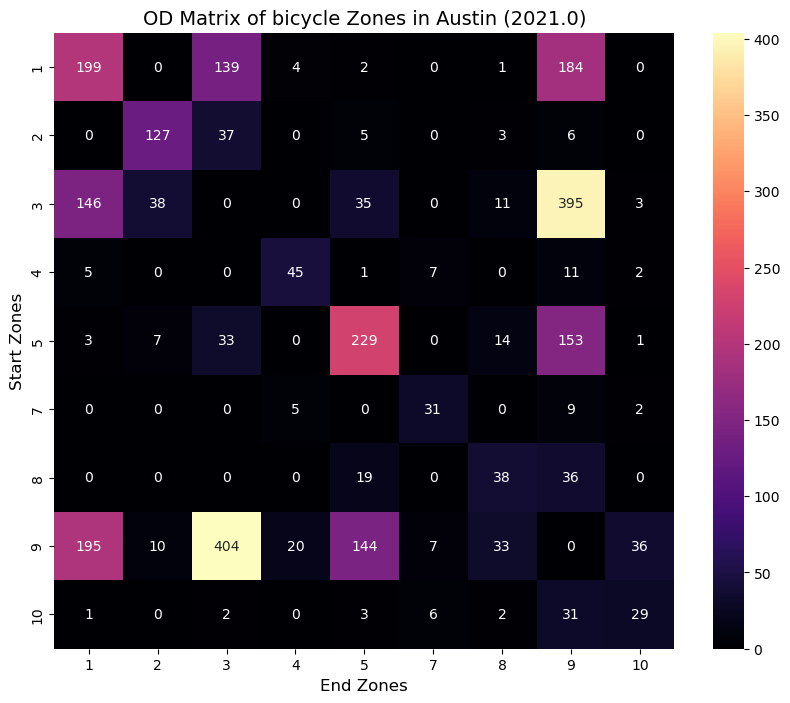

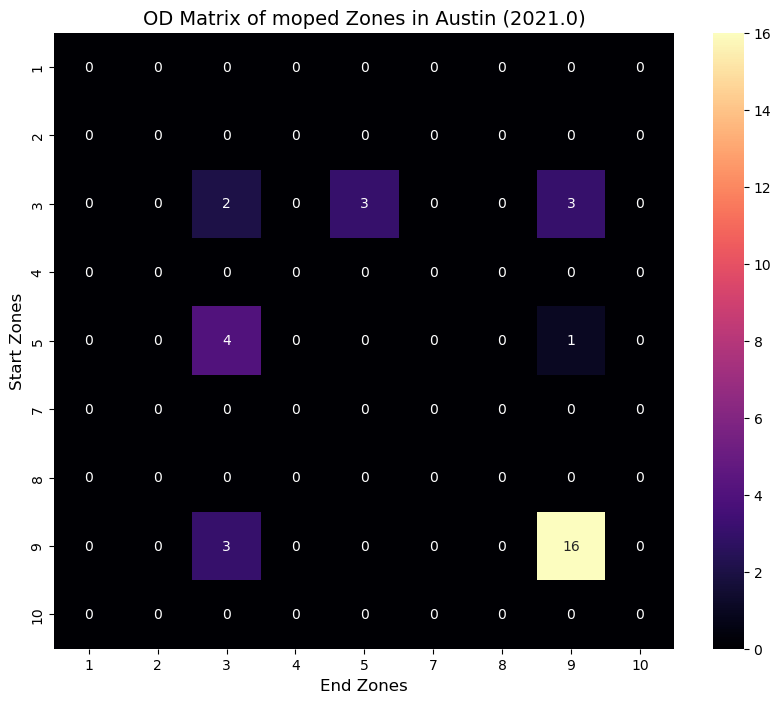

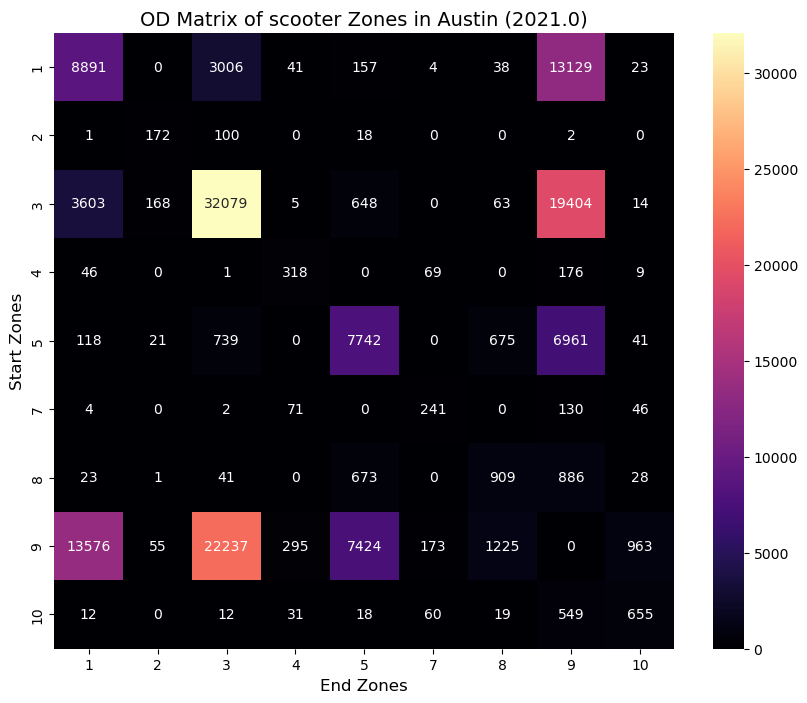

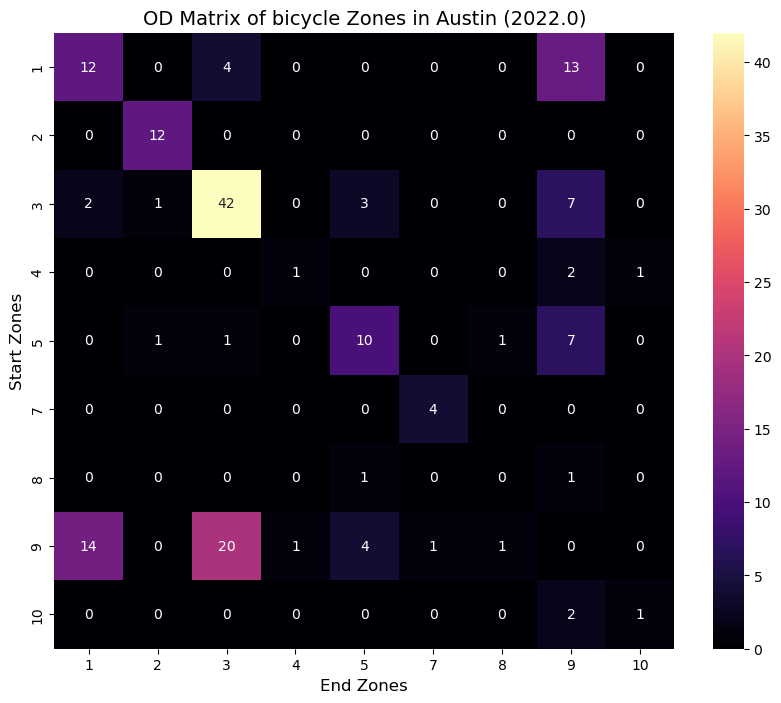

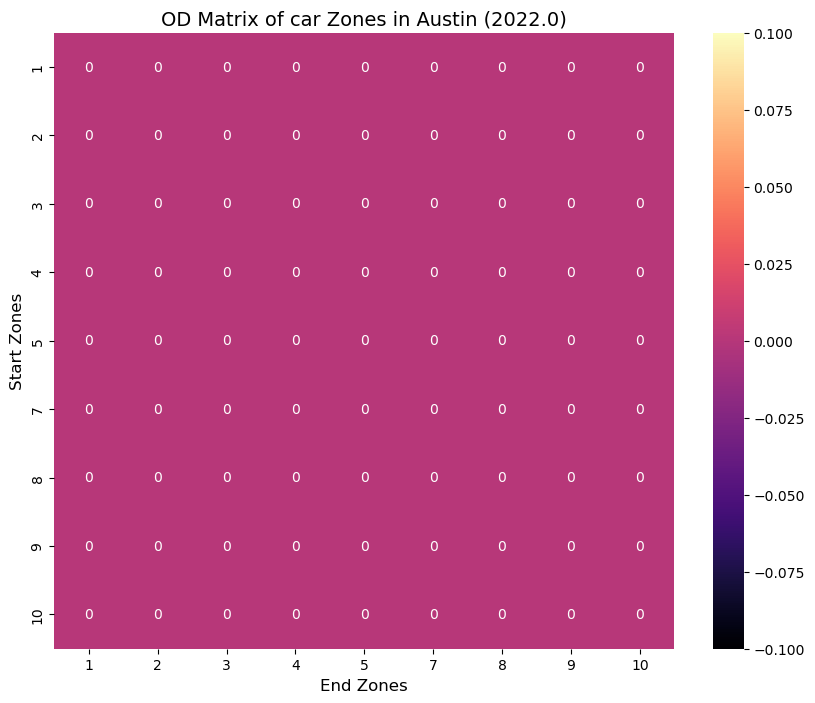

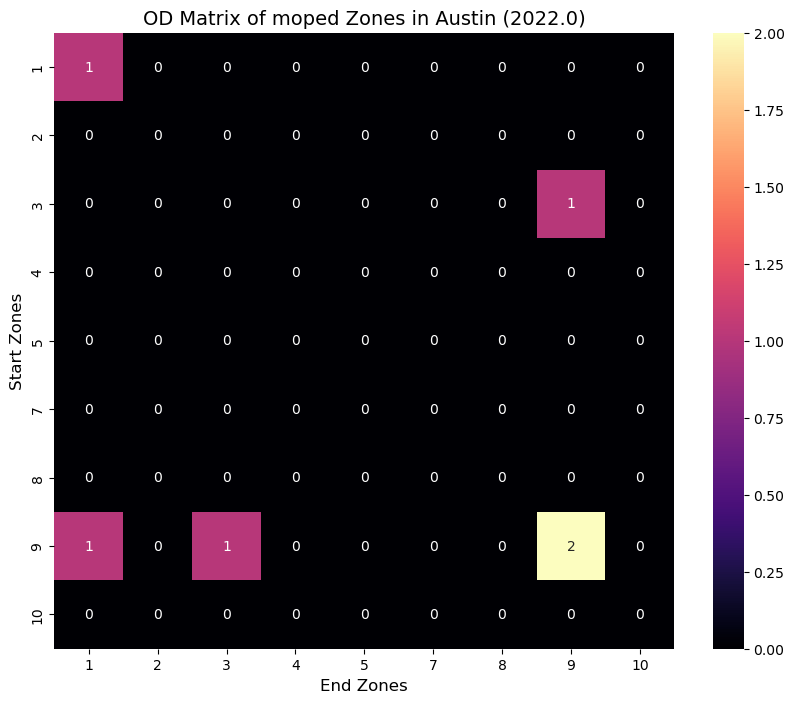

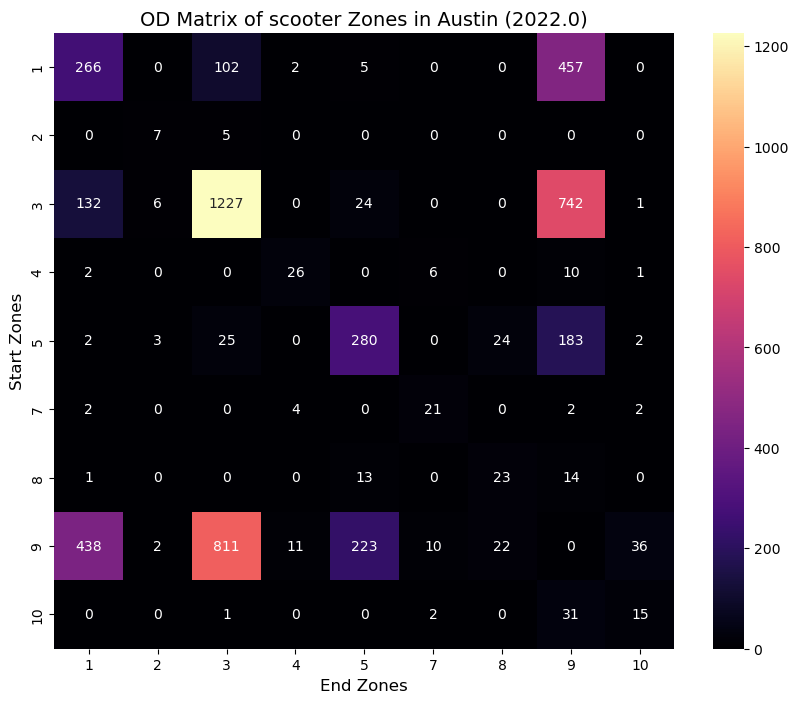

In [103]:
import seaborn as sns

# Set up index and columns for the base matrix (zone labels)
zone_labels = [1, 2, 3, 4, 5, 7, 8, 9, 10]  # Adjust as necessary for your zones

# Loop through each (year, vehicle_type) combination in the vehicle_year_matrices dictionary
for (year, vehicle_type), matrix in vehicle_year_matrices.items():
    # Ensure the matrix has consistent index/columns (using zone_labels)
    matrix_reindexed = matrix.reindex(index=zone_labels, columns=zone_labels, fill_value=0)
    
    # Plot the heatmap for each vehicle type and year
    plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
    sns.heatmap(matrix_reindexed, annot=True, fmt="d", cmap="magma", cbar=True)
    
    # Add title and labels including the year and vehicle type
    plt.title(f"OD Matrix of {vehicle_type} Zones in Austin ({year})", fontsize=14)
    plt.xlabel("End Zones", fontsize=12)
    plt.ylabel("Start Zones", fontsize=12)
    
    # Show the plot
    plt.show()

In [105]:
#In this section, we visually show how the data is displayed before and after the outliers are removed

    Council District (Start)  Council District (End)  Count
0                        1.0                     1.0   9369
1                        1.0                     3.0   3251
2                        1.0                     4.0     47
3                        1.0                     5.0    164
4                        1.0                     7.0      4
..                       ...                     ...    ...
61                      10.0                     5.0     21
62                      10.0                     7.0     68
63                      10.0                     8.0     21
64                      10.0                     9.0    613
65                      10.0                    10.0    700

[66 rows x 3 columns]


66

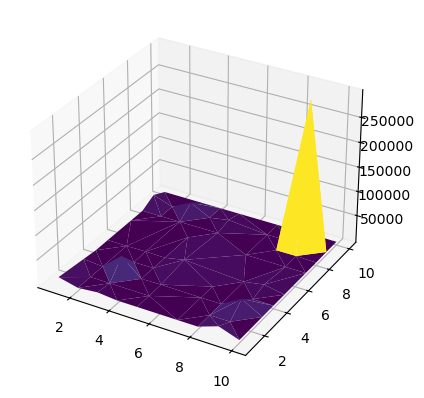

In [107]:
# OD matrix - 2nd method
# Group by two different columns
vehicle_type_groups_3d = df_cleaned.groupby(["Council District (Start)",
                                     "Council District (End)"]).size()
# reset index to change columns used for grouby from 'index' to 'column'
vehicle_type_groups_3d = vehicle_type_groups_3d.reset_index()

# Change column name for the count column
vehicle_type_groups_3d = vehicle_type_groups_3d.rename(columns={0: "Count"},
                                                             errors="raise")
print(vehicle_type_groups_3d)
#Plots in 3D
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')
ax.plot_trisurf(vehicle_type_groups_3d["Council District (Start)"], 
                vehicle_type_groups_3d["Council District (End)"], 
                vehicle_type_groups_3d["Count"], 
                cmap ='viridis',
                linewidths = 0.2);
len(vehicle_type_groups_3d)

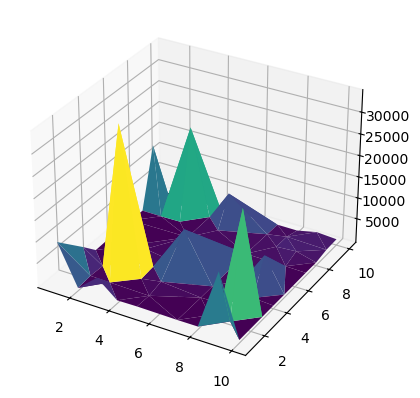

In [109]:
import numpy as np
from scipy import stats
VT_G_3d_df_no_outliers = vehicle_type_groups_3d[(np.abs(stats.zscore(vehicle_type_groups_3d['Count'])) < 3)]
ax = plt.axes(projection='3d')
ax.plot_trisurf(VT_G_3d_df_no_outliers["Council District (Start)"], 
                VT_G_3d_df_no_outliers["Council District (End)"], 
                VT_G_3d_df_no_outliers["Count"], 
                cmap ='viridis',
                linewidths = 0.2);


In [ ]:
#Exercise 3 –Relation to Public transport line

In [163]:
# Import the necessary library (pandas) and load the CSV file into a DataFrame
import pandas as pd
filename = r"DIVVY.csv"  # Specify the file path
df = pd.read_csv(filename, on_bad_lines="warn", sep=None, engine='python', thousands=",")


In [164]:
df.head(5)

,﻿TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION
0,8546790,12/31/2015 05:35:00 PM,12/31/2015 05:44:00 PM,979.0,521.0,117.0,Wilton Ave & Belmont Ave,229.0,Southport Ave & Roscoe St,Subscriber,Female,1991.0,41.940180,-87.653040,POINT (-87.65304 41.94018),41.943739,-87.664020,POINT (-87.66402 41.943739)
1,8546793,12/31/2015 05:37:00 PM,12/31/2015 05:41:00 PM,1932.0,256.0,301.0,Clark St & Schiller St,138.0,Clybourn Ave & Division St,Subscriber,Male,1992.0,41.907993,-87.631501,POINT (-87.631501 41.907993),41.904613,-87.640552,POINT (-87.640552 41.904613)
2,8546795,12/31/2015 05:37:00 PM,12/31/2015 05:40:00 PM,1693.0,134.0,465.0,Marine Dr & Ainslie St,251.0,Clarendon Ave & Leland Ave,Subscriber,Female,1987.0,41.971600,-87.650154,POINT (-87.650154 41.9716),41.967968,-87.650001,POINT (-87.650001 41.967968)
3,8546797,12/31/2015 05:38:00 PM,12/31/2015 05:55:00 PM,3370.0,995.0,333.0,Ashland Ave & Blackhawk St,198.0,Green St (Halsted St) & Madison St,Subscriber,Male,1975.0,41.907066,-87.667252,POINT (-87.667252 41.907066),41.881892,-87.648789,POINT (-87.648789 41.881892)
4,8546798,12/31/2015 05:38:00 PM,12/31/2015 05:41:00 PM,2563.0,177.0,48.0,Larrabee St & Kingsbury St,111.0,Sedgwick St & Huron St,Subscriber,Male,1990.0,41.897764,-87.642884,POINT (-87.642884 41.897764),41.894666,-87.638437,POINT (-87.638437 41.894666)


In [159]:
# Generate summary statistics of the DataFrame
df.describe()

,BIKE ID,TRIP DURATION,FROM STATION ID,TO STATION ID,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,TO LATITUDE,TO LONGITUDE,Year-Month
count,1.558831e+06,1.558831e+06,1.558831e+06,1.558831e+06,969286.000000,1.558831e+06,1.558831e+06,1.558831e+06,1.558831e+06,1558832
mean,1.479102e+03,1.121970e+03,1.538633e+02,1.538461e+02,1978.266778,4.189863e+01,-8.764018e+01,4.189915e+01,-8.764027e+01,2014-04-13 12:47:18.814702080
min,1.000000e+00,6.000000e+01,5.000000e+00,5.000000e+00,1898.000000,4.178875e+01,-8.770786e+01,4.178875e+01,-8.770786e+01,2013-06-01 00:00:00
25%,7.120000e+02,4.560000e+02,6.900000e+01,6.900000e+01,1972.000000,4.188096e+01,-8.765222e+01,4.188096e+01,-8.765230e+01,2014-04-01 00:00:00
50%,1.454000e+03,7.920000e+02,1.380000e+02,1.370000e+02,1981.000000,4.189174e+01,-8.763639e+01,4.189186e+01,-8.763639e+01,2014-06-01 00:00:00
75%,2.241000e+03,1.300000e+03,2.330000e+02,2.330000e+02,1986.000000,4.191808e+01,-8.762611e+01,4.191831e+01,-8.762603e+01,2014-07-01 00:00:00
max,3.370000e+03,8.639900e+04,4.650000e+02,3.510000e+02,1998.000000,4.197835e+01,-8.758071e+01,4.197835e+01,-8.758071e+01,2015-12-01 00:00:00
std,8.722627e+02,2.217219e+03,9.837237e+01,9.851607e+01,10.421263,2.915500e-02,1.917693e-02,2.934030e-02,1.945454e-02,NaN


In [151]:
# Get the number of rows and columns in the DataFrame
df.shape


(1558836, 18)

In [169]:
# Convert 'START TIME' to datetime format and extract Year-Month, then count records per month
df['START TIME'] = pd.to_datetime(df['START TIME'])  # Convert to datetime
df['Year-Month'] = df['START TIME'].dt.to_period('M')  # Extract Year-Month
monthly_counts = df.groupby('Year-Month').size()  # Count records per month
monthly_counts  # Display the result


C:\Users\Masoud\AppData\Local\Temp\ipykernel_14008\1658393444.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['START TIME'] = pd.to_datetime(df['START TIME'])  # Convert to datetime


Year-Month
2013-06      1626
2013-07     30330
2013-08    111785
2013-11     23719
2013-12     44673
2014-01     25076
2014-02     28087
2014-03     69308
2014-04    158476
2014-05    278745
2014-06    346007
2014-07    410340
2014-08     30651
2015-12         9
Freq: M, dtype: int64

In [154]:
#Based on our analysis, we decided to separate the data by one month of the year and peak time

# Ensure 'Year-Month' is in datetime format
df['Year-Month'] = pd.to_datetime(df['Year-Month'].astype(str))  # Convert 'Year-Month' to datetime

# Filter for the specific month (July 2014)
filtered_date = df[df['Year-Month'].dt.to_period('M') == '2014-07']  # Filter rows for July 2014

# Parse 'START TIME' as a full datetime and extract the time component
df['START TIME'] = pd.to_datetime(df['START TIME'], format='%Y-%m-%d %H:%M:%S').dt.time  # Extract time from 'START TIME'

# Define time ranges
morning_start = pd.to_datetime('07:00:00').time()  # Define start time for morning
morning_end = pd.to_datetime('09:00:00').time()    # Define end time for morning
evening_start = pd.to_datetime('17:00:00').time()   # Define start time for evening
evening_end = pd.to_datetime('19:00:00').time()     # Define end time for evening

# Filter based on time ranges
filtered_data = filtered_date[
    ((df['START TIME'] >= morning_start) & (df['START TIME'] <= morning_end)) |  # Morning time range filter
    ((df['START TIME'] >= evening_start) & (df['START TIME'] <= evening_end))    # Evening time range filter
]

# The 'filtered_data' now contains rows for July 2014 in the specified time ranges


C:\Users\Masoud\AppData\Local\Temp\ipykernel_14008\832975873.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = filtered_date[


In [171]:
# Save filtered data to a CSV file
# filtered_data.to_csv(r"C:\Users\Masoud\Desktop\transport lab\clean divyy\filtered_data1.csv", index=False)


In [176]:
#Exercise 4 –Parking duration and costs

In [178]:
# Import the pandas library and read the CSV file with specific handling for bad lines and formatting options
import pandas as pd

# Read the micro-mobility dataset from the specified file path
filename = r"micro_mobility_chicago.csv"
data_micro = pd.read_csv(filename, on_bad_lines="warn", sep=None, engine='python', thousands=",")  # Load CSV with custom settings
data_micro.head(5)

,﻿TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION,Year-Month
0,2355719,2014-07-01 07:00:00,07/01/2014 07:12:00 AM,2381.0,731.0,255.0,Indiana Ave & Roosevelt Rd,264.0,Stetson Ave & South Water St,Subscriber,Male,1978.0,41.867888,-87.623041,POINT (-87.623041 41.867888),41.886835,-87.622320,POINT (-87.62232 41.886835),2014-07-01
1,2355720,2014-07-01 07:00:00,07/01/2014 07:09:00 AM,797.0,553.0,190.0,Southport Ave & Wrightwood Ave,58.0,Marshfield Ave & Cortland St,Subscriber,Male,1990.0,41.928880,-87.663170,POINT (-87.66317 41.92888),41.916017,-87.668879,POINT (-87.668879 41.916017),2014-07-01
2,2355722,2014-07-01 07:00:00,07/01/2014 07:07:00 AM,200.0,433.0,66.0,Clinton St & Lake St,283.0,LaSalle St & Jackson Blvd,Subscriber,Male,1988.0,41.885464,-87.641253,POINT (-87.641253 41.885464),41.878170,-87.631985,POINT (-87.631985 41.87817),2014-07-01
3,2355723,2014-07-01 07:00:00,07/01/2014 07:11:00 AM,2026.0,666.0,264.0,Stetson Ave & South Water St,286.0,Franklin St & Quincy St,Subscriber,Male,1986.0,41.886835,-87.622320,POINT (-87.62232 41.886835),41.878724,-87.634793,POINT (-87.634793 41.878724),2014-07-01
4,2355724,2014-07-01 07:00:00,07/01/2014 07:06:00 AM,1619.0,338.0,84.0,Union Ave & Grand Ave,91.0,Clinton St & Washington Blvd,Subscriber,Male,1985.0,41.891000,-87.645925,POINT (-87.645925 41.891),41.883380,-87.641170,POINT (-87.64117 41.88338),2014-07-01


In [182]:
# Import the csv module and pandas library to handle large CSV file reading
import csv

# Specify the file path for the CSV file
filename = r"Wards_Chicago.csv"

# Increase the field size limit in the CSV module to handle large fields
csv.field_size_limit(1000000)  # Adjust the limit as needed to allow reading large rows

# Now read the CSV file with the updated parameters
Wards_Chicago = pd.read_csv(filename, on_bad_lines="warn", sep=None, engine='python', thousands=",")  # Load CSV with custom settings
Wards_Chicago.head(5)

,﻿Ward,the_geom,objectid,edit_date,ward_id,globalid,st_area_sh,st_length_
0,1,MULTIPOLYGON (((-87.68777205374418 41.92858465...,51,06/01/2022,1,{DB2A2A7D-FAF1-42A4-B061-AE18C31A80BB},6.589346e+07,61878.821587
1,2,MULTIPOLYGON (((-87.62517201063106 41.90399836...,52,06/01/2022,2,{88F300F6-D6DF-4337-8DE3-0C2D27A5B338},3.128511e+07,74175.949239
2,5,MULTIPOLYGON (((-87.56030308695986 41.76635735...,55,06/01/2022,5,{0A109A41-9DED-47D7-934E-1EA1CC7EE025},1.120803e+08,88207.690241
3,6,MULTIPOLYGON (((-87.61794321281114 41.77292489...,56,06/01/2022,6,{FD74A999-4BBA-4CE3-BEBB-CC76423037E8},1.392022e+08,80779.851890
4,7,MULTIPOLYGON (((-87.54393108740227 41.76029599...,57,06/01/2022,7,{279FCBD9-EA0D-4FFC-A8CA-EDA2676C0721},1.414924e+08,98906.567862


In [184]:
# Import necessary libraries for data manipulation, geospatial analysis, and visualization
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the data
# Replace 'micro_mobility.csv' and 'ward_chicago.csv' with your actual file paths
micro_mobility = pd.read_csv(r'micro_mobility_chicago.csv')  # Load micro-mobility data using pandas
wards = gpd.read_file(r'Wards_Chicago.csv')  # Load geographical data of Chicago wards using GeoPandas


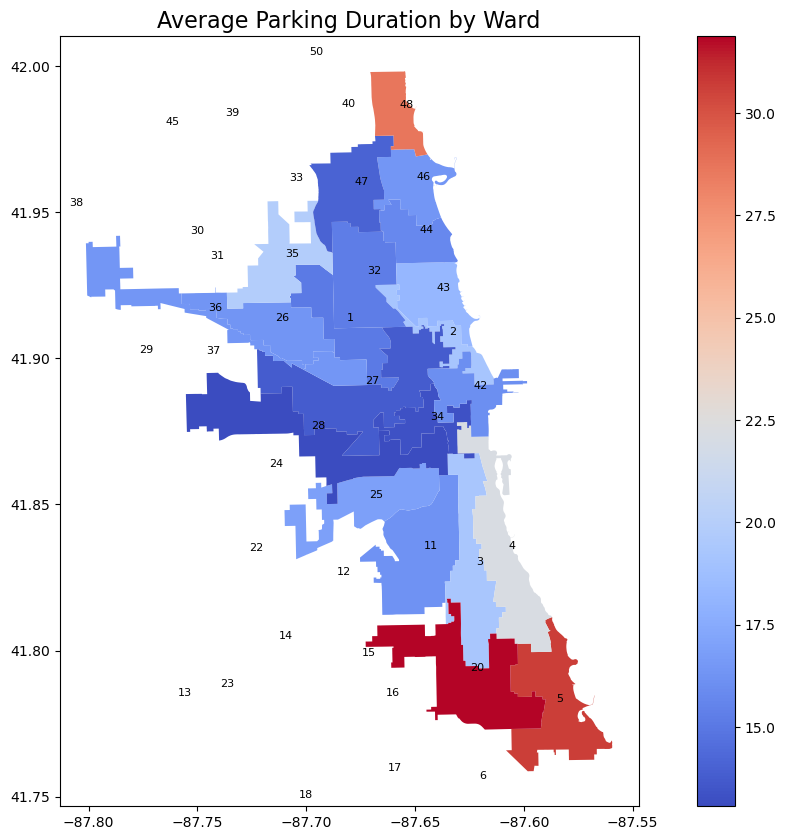

In [189]:
##******question one******

#What is the average parking duration of vehicles in different council districts or wards? –Display this info using a map

# Calculate parking durations
# Convert START TIME and STOP TIME to datetime
micro_mobility['START TIME'] = pd.to_datetime(micro_mobility['START TIME'])
micro_mobility['STOP TIME'] = pd.to_datetime(micro_mobility['STOP TIME'])

# Calculate parking duration in minutes
micro_mobility['PARKING DURATION'] = (micro_mobility['STOP TIME'] - micro_mobility['START TIME']).dt.total_seconds() / 60

# Map trips to wards
# Convert micro-mobility coordinates to GeoDataFrame
micro_mobility_gdf = gpd.GeoDataFrame(
    micro_mobility, 
    geometry=gpd.points_from_xy(micro_mobility['FROM LONGITUDE'], micro_mobility['FROM LATITUDE']),
    crs="EPSG:4326"
)

# Convert 'wards' to GeoDataFrame if it's not already
if not isinstance(wards, gpd.GeoDataFrame):
    wards = gpd.GeoDataFrame(wards, geometry=gpd.GeoSeries.from_wkt(wards['the_geom']), crs="EPSG:4326")

# Perform spatial join to map trips to wards
micro_mobility_with_wards = gpd.sjoin(micro_mobility_gdf, wards, how='inner', predicate='within')

# Aggregate results
average_parking_duration = micro_mobility_with_wards.groupby('Ward')['PARKING DURATION'].mean().reset_index()
average_parking_duration.rename(columns={'PARKING DURATION': 'AVERAGE PARKING DURATION'}, inplace=True)

# Merge with ward GeoDataFrame for visualization
wards = wards.merge(average_parking_duration, on='Ward', how='left')

# Step 5: Visualize on a map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot wards with average parking duration color-coded
wards.plot(column='AVERAGE PARKING DURATION', cmap='coolwarm', legend=True, ax=ax)

# Add ward numbers as labels
for idx, row in wards.iterrows():
    if row['geometry'] is not None:  # Ensure geometry is valid
        centroid = row['geometry'].centroid
        ax.annotate(
            text=row['Ward'],  # Display ward number
            xy=(centroid.x, centroid.y),
            xytext=(3, 3),  # Offset to avoid overlap
            textcoords="offset points",
            fontsize=8,
            color="black"
        )

# Add title and show the map
plt.title('Average Parking Duration by Ward', fontsize=16)
plt.show()

In [191]:
# Display as a table
average_parking_duration

,Ward,AVERAGE PARKING DURATION
0,1,15.099800
1,11,16.164767
2,2,19.233565
3,20,31.875000
4,25,16.925226
5,26,16.312896
6,27,13.787014
7,28,13.067437
8,3,19.264319
9,32,15.251832


In [ ]:

#****note>>>>>>>Since the outputs in this section are in CSV and SHP file formats (for use in QGIS), we used
    # to comment out the code to prevent it from running multiple times on the system.#***






In [214]:
# #We added the "Parking Duration" column to the data and obtained the SHP file format for use in QGIS
# # Merge the average parking duration data with the wards dataset on the 'Ward' column using a left join
# wards_with_parking_duration = wards.merge(
#     average_parking_duration,  # This should be the DataFrame containing 'Ward' and 'PARKING DURATION'
#     on='Ward',  # Merge on the 'Ward' column to match data from both datasets
#     how='left'  # Perform a left join to keep all rows from the wards dataset and add matching 'PARKING DURATION'
# )

# # Save the merged data to a shapefile, adjust the file path as needed
# # wards_with_parking_duration.to_file(r'C:\Users\wards_with_parking_duration.shp')  # Save to shapefile
# # This will create the shapefile that includes the geometry and 'PARKING DURATION'

In [199]:
##******question two******


#Preparing the OD matrix file based on the number of trips made and exporting the CSV output for QGIS

# import pandas as pd
# import geopandas as gpd
# from shapely.geometry import Point

# # Step 1: Load the datasets
# micro_mobility = pd.read_csv(r'micro_mobility_chicago.csv')
# wards = pd.read_csv(r'Wards_Chicago.csv')

# # Step 2: Convert micro-mobility data to a GeoDataFrame
# # Convert the latitude and longitude columns to points
# micro_mobility['FROM POINT'] = [Point(xy) for xy in zip(micro_mobility['FROM LONGITUDE'], micro_mobility['FROM LATITUDE'])]
# micro_mobility['TO POINT'] = [Point(xy) for xy in zip(micro_mobility['TO LONGITUDE'], micro_mobility['TO LATITUDE'])]

# # Convert to GeoDataFrame with the appropriate CRS (WGS84)
# gdf_micro_mobility = gpd.GeoDataFrame(micro_mobility, geometry='FROM POINT', crs="EPSG:4326")

# # Convert the wards data to a GeoDataFrame
# wards_gdf = gpd.GeoDataFrame(wards, geometry=gpd.GeoSeries.from_wkt(wards['the_geom']), crs="EPSG:4326")

# # Step 3: Spatial Join - Assign each trip to a ward based on FROM and TO locations
# # Perform spatial join to identify the ward for the 'FROM' location
# gdf_micro_mobility = gpd.sjoin(gdf_micro_mobility, wards_gdf, how="left", predicate="within")

# # Perform spatial join to identify the ward for the 'TO' location
# gdf_micro_mobility['TO WARD'] = gdf_micro_mobility.apply(
#     lambda row: wards_gdf[wards_gdf.geometry.contains(row['TO POINT'])]['Ward'].values[0] if not wards_gdf[wards_gdf.geometry.contains(row['TO POINT'])].empty else None,
#     axis=1
# )

# # Step 4: Add longitude and latitude for FROM and TO WARD centroids
# # Calculate centroids for each ward
# wards_gdf['CENTROID'] = wards_gdf.geometry.centroid
# wards_gdf['CENTROID_LON'] = wards_gdf.CENTROID.x
# wards_gdf['CENTROID_LAT'] = wards_gdf.CENTROID.y

# # Merge FROM WARD coordinates into the OD matrix
# gdf_micro_mobility = gdf_micro_mobility.merge(
#     wards_gdf[['Ward', 'CENTROID_LON', 'CENTROID_LAT']],
#     how='left',
#     left_on='Ward',
#     right_on='Ward'
# )
# gdf_micro_mobility.rename(columns={'CENTROID_LON': 'FROM_LON', 'CENTROID_LAT': 'FROM_LAT'}, inplace=True)

# # Merge TO WARD coordinates into the OD matrix
# gdf_micro_mobility = gdf_micro_mobility.merge(
#     wards_gdf[['Ward', 'CENTROID_LON', 'CENTROID_LAT']],
#     how='left',
#     left_on='TO WARD',
#     right_on='Ward',
#     suffixes=('', '_TO')
# )
# gdf_micro_mobility.rename(columns={'CENTROID_LON': 'TO_LON', 'CENTROID_LAT': 'TO_LAT'}, inplace=True)

# # Step 5: Create the OD matrix (Origin-Destination Matrix)
# # Group by the 'FROM WARD' and 'TO WARD' columns, adding longitude/latitude
# od_matrix = gdf_micro_mobility.groupby(['Ward', 'TO WARD', 'FROM_LON', 'FROM_LAT', 'TO_LON', 'TO_LAT']).size().reset_index(name='TRIP COUNT')

# # Step 6: Export the OD matrix to a CSV file
# od_matrix.to_csv(r'od_matrix_with_coords new.csv', index=False)

# # The file 'od_matrix_with_coords.csv' is now ready for use in QGIS.

In [ ]:

# # import geopandas as gpd
# # from shapely.geometry import LineString

# # Step 1: Load the OD matrix CSV containing coordinates for origin and destination
# od_matrix = pd.read_csv(r'od_matrix_with_coords new.csv')

# # Step 2: Create LineString geometries by combining the 'FROM_LON', 'FROM_LAT' with 'TO_LON', 'TO_LAT'
# od_matrix['geometry'] = od_matrix.apply(
#     lambda row: LineString([(row['FROM_LON'], row['FROM_LAT']), (row['TO_LON'], row['TO_LAT'])]),
#     axis=1
# )

# # Step 3: Convert the data to a GeoDataFrame, assigning 'geometry' column and setting CRS to WGS84 (EPSG:4326)
# gdf_od_matrix = gpd.GeoDataFrame(od_matrix, geometry='geometry', crs="EPSG:4326")

# # Step 4: Save the GeoDataFrame to a GeoJSON file for easier sharing and web use
# geojson_path = r'C:\Users\od_matrix_paths.geojson'
# gdf_od_matrix.to_file(geojson_path, driver='GeoJSON')

# # Step 5: (Optional) Save the same data to a Shapefile if more detailed geospatial analysis is needed
# shapefile_path = r'C:\Users\od_matrix_paths.shp'
# gdf_od_matrix.to_file(shapefile_path, driver='ESRI Shapefile')

# # Confirmation message showing the saved file paths
# print(f"Files saved successfully:\nGeoJSON: {geojson_path}\nShapefile: {shapefile_path}")


In [ ]:
# matrix = od_matrix.pivot_table(index='Ward', columns='TO WARD', values='TRIP COUNT', aggfunc='sum', fill_value=0)

# # Display the resulting matrix
# matrix
# # Create a pivot table to reshape the 'od_matrix' DataFrame
# # The pivot table aggregates 'TRIP COUNT' based on the 'Ward' as the index and 'TO WARD' as columns
# matrix = od_matrix.pivot_table(
#     index='Ward',  # Rows will represent the 'Ward' values
#     columns='TO WARD',  # Columns will represent the destination wards ('TO WARD')
#     values='TRIP COUNT',  # Values are the 'TRIP COUNT' for each origin-destination pair
#     aggfunc='sum',  # Aggregate the values by summing up trip counts for matching pairs
#     fill_value=0  # Fill missing values with 0 (no trips for that pair)
# )

# # Display the resulting matrix (Origin-Ward x Destination-Ward)
# matrix



In [ ]:
# # Assuming od_matrix is your DataFrame and you've already created the pivot table
# matrix = od_matrix.pivot_table(
#     index='Ward',  # Use 'Ward' as index (rows)
#     columns='TO WARD',  # Use 'TO WARD' as columns (destination)
#     values='TRIP COUNT',  # The values are 'TRIP COUNT'
#     aggfunc='sum',  # Aggregate the trip counts by summing
#     fill_value=0  # Fill missing values with 0
# )

# # Plot the heatmap
# plt.figure(figsize=(12, 10))  # Set figure size to provide enough space for the annotations
# sns.heatmap(
#     matrix,  # The pivot table to plot
#     annot=True,  # Display the values in each cell
#     fmt="d",  # Format the annotations as integers
#     cmap="YlGnBu",  # Use the 'YlGnBu' colormap (Yellow-Green-Blue gradient)
#     cbar=True,  # Show the color bar on the side
#     annot_kws={"size": 8},  # Reduce the font size of annotations for better readability
#     linewidths=0.5,  # Add a small border around each cell for clarity
#     linecolor='white'  # Set the line color between cells
# )

# # Optional: Add titles and labels
# plt.title("Trip Count Matrix Heatmap", fontsize=16)  # Add a title with larger font size
# plt.xlabel("Destination Ward", fontsize=12)  # Label for x-axis
# plt.ylabel("Origin Ward", fontsize=12)  # Label for y-axis

# # Adjust layout to prevent label overlap
# plt.tight_layout()

# # Save the plot as an image file
# output_filename = r"heatmap_image1.png"  # Set the file path to save the image
# plt.savefig(output_filename, bbox_inches='tight')  # Save with a tight layout to ensure no parts are cut off

# # Display the heatmap
# plt.show()

In [ ]:
##******question three******
#Calculate the revenues

In [201]:
# Assuming 'USER TYPE' column in your dataset has values like 'Subscriber' and 'Customer'

# Calculate revenue for customers (time-based pricing)
data_micro['Revenue'] = 0.0  # Initialize the Revenue column

# For customers: Assume they are charged per minute
data_micro.loc[data_micro['USER TYPE'] == 'Customer', 'Revenue'] = data_micro['TRIP DURATION'] * 0.10  # $0.10 per minute

# For subscribers: Assume they pay a fixed monthly fee (for simplicity, assume $10 per month)
# You can calculate annual subscription revenue later.
data_micro.loc[data_micro['USER TYPE'] == 'Subscriber', 'Revenue'] = 10 # $10 per month

# Now, calculate the total revenue
total_revenue = data_micro['Revenue'].sum()
print(f"Total Revenue from Customers and Subscribers: ${total_revenue:.2f}")

Total Revenue from Customers and Subscribers: $6055689.70


In [203]:
# Assuming subscribers get 1 hour per day for free, and anything above that is charged at $0.05 per minute
free_usage_minutes_per_day = 60  # 1 hour per day for free
extra_charge_per_minute = 0.05  # $0.05 per minute beyond the free time

# Calculate total minutes used by each subscriber
data_micro['Trip Duration in Hours'] = data_micro['TRIP DURATION'] / 60  # Convert to hours

# Identify subscribers and calculate extra charge for usage beyond free hours
data_micro['Extra Revenue from Subscribers'] = 0.0  # Initialize column

# If the subscriber's trip duration exceeds the free time, charge for the extra time
data_micro.loc[(data_micro['USER TYPE'] == 'Subscriber') & (data_micro['Trip Duration in Hours'] > free_usage_minutes_per_day),
               'Extra Revenue from Subscribers'] = (data_micro['Trip Duration in Hours'] - free_usage_minutes_per_day) * extra_charge_per_minute

# Now, calculate the additional revenue from extra usage
extra_revenue = data_micro['Extra Revenue from Subscribers'].sum()
print(f"Extra Revenue from Subscribers (above free usage): ${extra_revenue:.2f}")

Extra Revenue from Subscribers (above free usage): $1379.79


In [205]:
# Assuming subscribers get 1 hour per day for free, and anything above that is charged at $0.05 per minute
free_usage_minutes_per_day = 60  # 1 hour per day for free
extra_charge_per_minute = 0.05  # $0.05 per minute beyond the free time

# Calculate total minutes used by each subscriber
data_micro['Trip Duration in Hours'] = data_micro['TRIP DURATION'] / 60  # Convert to hours

# Identify subscribers and calculate extra charge for usage beyond free hours
data_micro['Extra Revenue from Subscribers'] = 0.0  # Initialize column

# If the subscriber's trip duration exceeds the free time, charge for the extra time
data_micro.loc[(data_micro['USER TYPE'] == 'Subscriber') & (data_micro['Trip Duration in Hours'] > free_usage_minutes_per_day),
               'Extra Revenue from Subscribers'] = (data_micro['Trip Duration in Hours'] - free_usage_minutes_per_day) * extra_charge_per_minute

# Now, calculate the additional revenue from extra usage
extra_revenue = data_micro['Extra Revenue from Subscribers'].sum()
print(f"Extra Revenue from Subscribers (above free usage): ${extra_revenue:.2f}")

Extra Revenue from Subscribers (above free usage): $1379.79


In [209]:
# Example: Fixed costs (same as before)
cost_per_bike = 500  # Cost per bike in dollars
bike_maintenance_cost_per_year = 50  # Maintenance cost per bike per year in dollars
number_of_bikes = data_micro['BIKE ID'].nunique()  # Number of unique bikes

# Total cost of bikes
total_bike_cost = cost_per_bike * number_of_bikes

# Total maintenance cost
total_maintenance_cost = bike_maintenance_cost_per_year * number_of_bikes

# Operational costs (fixed)
staff_salaries_annual = 200000  # Example: Annual salary costs for staff
office_costs_annual = 50000  # Example: Annual office and infrastructure costs

# Total fixed costs
total_fixed_costs = total_bike_cost + total_maintenance_cost + staff_salaries_annual + office_costs_annual
print(f"Total Fixed Costs: ${total_fixed_costs:.2f}")

# Variable costs per trip (can be scaled based on actual usage)
cost_per_trip = 1  # Example: cost per trip in dollars (e.g., customer support, energy costs)

# Calculate the total variable cost based on the number of trips
total_trip_cost = data_micro['TRIP DURATION'].sum() * cost_per_trip / 60  # In dollars

# If you have additional variable costs (e.g., energy, fuel), include them here
energy_cost_per_trip = 0.05  # Example: Energy cost per trip in dollars
total_energy_cost = data_micro['TRIP DURATION'].sum() * energy_cost_per_trip / 60  # Energy cost for all trips

# Total variable costs
total_variable_costs = total_trip_cost + total_energy_cost
print(f"Total Variable Costs: ${total_variable_costs:.2f}")

Total Fixed Costs: $1799350.00
Total Variable Costs: $2159873.21


In [211]:
# Total revenue (customers + subscribers)
total_revenue = data_micro['Revenue'].sum() + extra_revenue

# Total costs (fixed + variable)
total_costs = total_fixed_costs + total_variable_costs

# Calculate profit or loss
profit_or_loss = total_revenue - total_costs
print(f"Profit/Loss: ${profit_or_loss:.2f}")

Profit/Loss: $2097846.28
